In [68]:
# Importat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset

data_cut = pd.read_csv\
("/home/adzavon/Documents/MSC_Data_Analysis/merge for forecasting/second_to_forecast (another copy).csv")


data_cut.head()

,EVENT_DATE,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,Floods,Storms,Internal Displaced People
0,2018-07,5,0,1,0,1,9,18.0,3.0,27347.0
1,2018-08,7,3,3,2,3,3,211.0,4.0,27571.0
2,2018-09,8,5,4,2,11,20,33.0,0.0,38982.0
3,2018-10,9,3,16,1,12,19,3.0,0.0,39731.0
4,2018-11,15,2,24,11,15,20,NaN,NaN,37367.0


In [69]:

# fill the missing values in "Floods","Storms" by "0"
data_cut[["Floods","Storms"]] = data_cut[["Floods","Storms"]].fillna("0")


# change "Floods","Storms" data type into intger

data_cut["Floods"] = data_cut["Floods"].astype(int)
data_cut["Storms"] = data_cut["Storms"].astype(int)

#linear method to fill the missang value
# data_cut = data_cut.fillna(method="ffill")
data_cut = data_cut.interpolate(method ='linear', limit_direction ='forward')
data_cut["Internal Displaced People"] = data_cut["Internal Displaced People"].astype(int)
#data_cut.iloc[:,1:]



data_cut["Violent events"] = data_cut["Battles"] + data_cut["Explosions/Remote violence"] + data_cut["Violence against civilians"]
data_cut["Demonstrations"] = data_cut["Protests"] + data_cut["Riots"]
data_cut["Non-violent actions"] = data_cut["Strategic developments"]

# data_cut_ = data_cut[["Violent events","Demonstrations","Non-violent actions","Internal Displaced People"]]
# data_cut_

In [70]:
data_cut_new = data_cut[["EVENT_DATE","Violent events","Demonstrations","Non-violent actions","Floods","Storms","Internal Displaced People"]]
.to_csv("causality_and_var.csv")


SyntaxError: invalid syntax (3993447270.py, line 2)

In [71]:
# df1 = data_cut["Battles"]
# df2 = data_cut["Explosions/Remote violence"]
# df3 = data_cut["Protests"]
df4 = data_cut_new["Violent events"]
df5 = data_cut_new["Demonstrations"]
df6 = data_cut_new["Non-violent actions"]
df7 = data_cut_new["Floods"]
df8 = data_cut_new["Storms"]
df9 = data_cut_new["Internal Displaced People"]

dfa = ["Violent events","Demonstrations","Non-violent actions","Floods","Storms"]

data_cut_new

,EVENT_DATE,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
0,2018-07,14,1,1,18,3,27347
1,2018-08,13,5,3,211,4,27571
2,2018-09,33,6,11,33,0,38982
3,2018-10,31,17,12,3,0,39731
4,2018-11,37,35,15,0,0,37367
5,2018-12,36,15,11,0,0,47826
6,2019-01,53,35,4,0,0,81964
7,2019-02,40,16,16,0,0,112057
8,2019-03,51,8,8,0,0,135589
9,2019-04,72,21,8,0,3,161217


Text(0.5, 1.0, 'Boxplot to check the for outliers')

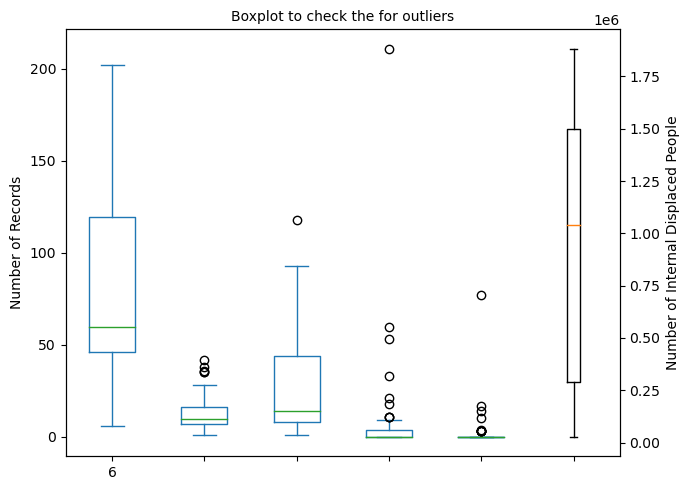

In [72]:
fig,ax = plt.subplots(figsize = (7,5))

dta = data_cut_new[["Violent events","Demonstrations","Non-violent actions","Floods","Storms"]]
ticks = ["Violent events","Demonstrations","Non-violent actions","Floods","Storms"]
plt.ylabel("Number of Records",fontsize=10)
dta.plot(kind="box",ax=ax,label = dta)

ax2 = ax.twinx()

ax2.boxplot(df9,positions=[6])
ax2.set_ylabel("Number of Internal Displaced People",fontsize=10)
plt.title("Boxplot to check the for outliers",fontsize=10)

/tmp/ipykernel_332309/3471216012.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_cut_new.corr(method="pearson")


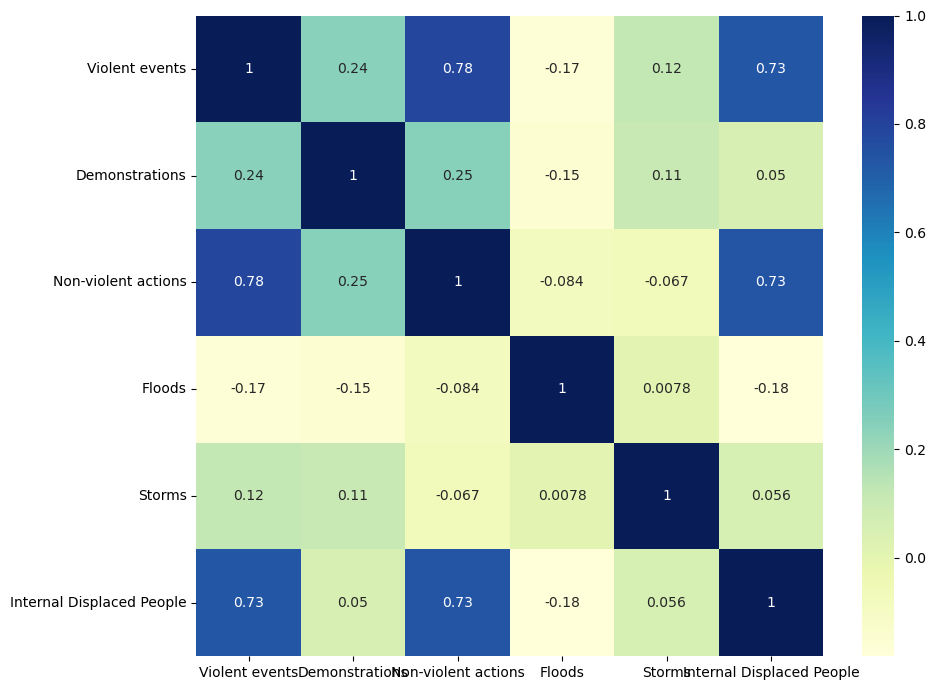

In [73]:
# calculate a correlation coefficient of pearson

corr = data_cut_new.corr(method="pearson")
f, ax = plt.subplots(figsize=(10, 7))

cmap = sns.diverging_palette(230, 40, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

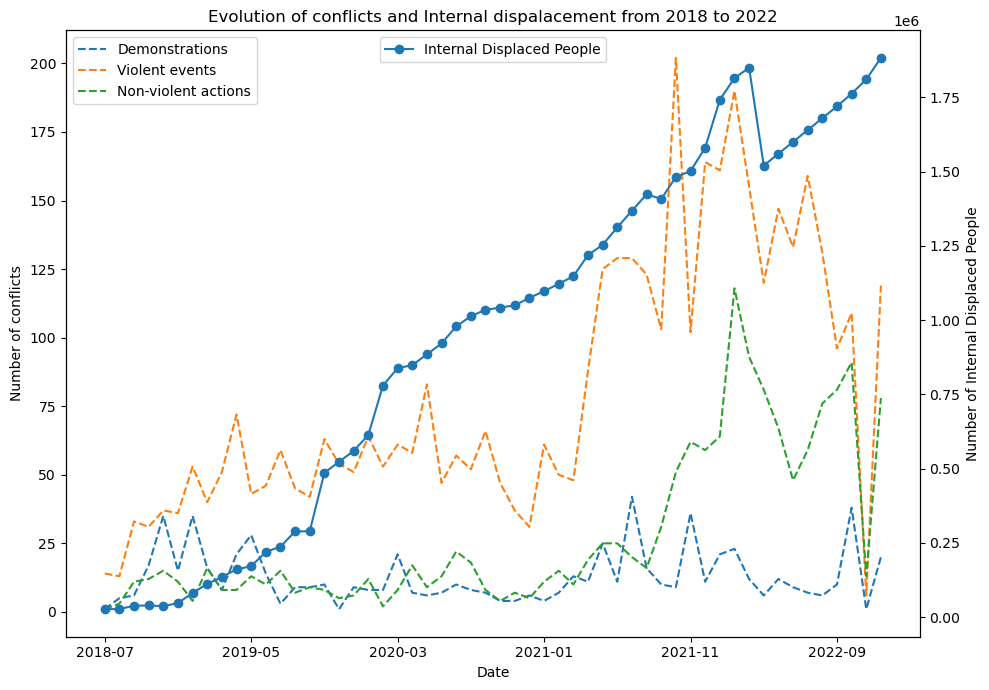

In [74]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10.00, 7.0]
plt.rcParams["figure.autolayout"] = True


# fig, ax = plt.subplots(figsize=(10, 7))
ax = data_cut.plot(x='EVENT_DATE', y='Demonstrations',ls='--',label ="Demonstrations" )
data_cut.plot(ax=ax, x='EVENT_DATE', y='Violent events',ls='--',label ="Violent events" )
data_cut.plot(ax=ax, x='EVENT_DATE', y='Non-violent actions',ls='--',label ="Non-violent actions" )

# data_cut.plot(ax=ax, x='EVENT_DATE', y='Riots',label ="Riots" )
# data_cut.plot(ax=ax, x='EVENT_DATE', y='Protests',label ="Protests" )
# data_cut.plot(ax=ax, x='EVENT_DATE', y='Strategic developments',label ="Strategic development" )
#ax.bar(x, y1, color = 'g')
#ax.bar(data_cut['EVENT_DATE'], data_cut['Floods'])
#ax.bar(data_cut['EVENT_DATE'], data_cut['Storms'])


ax.set_xlabel("Date",fontsize=10)
ax.set_ylabel("Number of conflicts",fontsize=10)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_cut['EVENT_DATE'], data_cut['Internal Displaced People'],marker="o",label = "Internal Displaced People")
ax2.set_ylabel("Number of Internal Displaced People",fontsize=10)
ax2.legend(loc=9)

plt.title('Evolution of conflicts and Internal dispalacement from 2018 to 2022')
plt.tight_layout()
plt.savefig("plot.png")
plt.show()


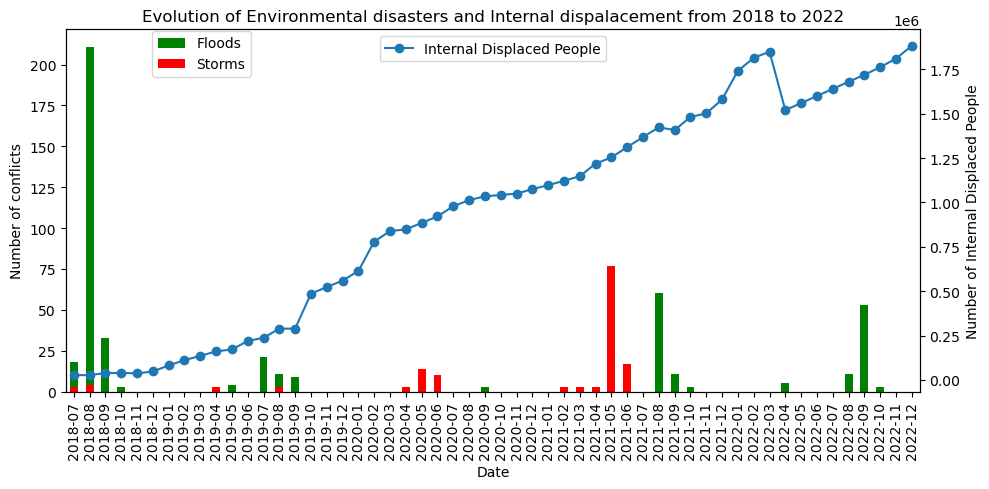

In [75]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True



ax = data_cut.plot(kind = "bar",x='EVENT_DATE', y='Floods',color= "green",label = "Floods")
data_cut.plot(kind="bar", ax=ax, x='EVENT_DATE', y='Storms',color= "red",label = "Storms")

ax.set_xlabel("Date",fontsize=10)
ax.set_ylabel("Number of conflicts",fontsize=10)
ax.legend(bbox_to_anchor=(.15,.94),bbox_transform=plt.gcf().transFigure)
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(data_cut['EVENT_DATE'], data_cut['Internal Displaced People'],marker="o",label = "Internal Displaced People")
ax2.set_ylabel("Number of Internal Displaced People",fontsize=10)
ax2.legend(loc=9)

plt.title('Evolution of Environmental disasters and Internal dispalacement from 2018 to 2022')
plt.tight_layout()
plt.show()

In [76]:
from scipy.stats import pearsonr
import numpy as np
rho = data_cut_new.corr()
pval = data_cut_new.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

/tmp/ipykernel_332309/921731607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho = data_cut_new.corr()
/tmp/ipykernel_332309/921731607.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pval = data_cut_new.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)


,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
Violent events,1.0***,0.24,0.78***,-0.17,0.12,0.73***
Demonstrations,0.24,1.0***,0.25,-0.15,0.11,0.05
Non-violent actions,0.78***,0.25,1.0***,-0.08,-0.07,0.73***
Floods,-0.17,-0.15,-0.08,1.0***,0.01,-0.18
Storms,0.12,0.11,-0.07,0.01,1.0***,0.06
Internal Displaced People,0.73***,0.05,0.73***,-0.18,0.06,1.0***


In [91]:
# split my dataframe into season
data_cut['EVENT_DATE'] = pd.to_datetime(data_cut['EVENT_DATE'],errors='coerce')


first_season_df1 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month ==7]
first_season_df2 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month ==8]
first_season_df3 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month ==9]
first_season_df4 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month ==10]
first_season_df5 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month ==6]

second_season_df1 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month < 6]
second_season_df2 = data_cut_new.loc[data_cut['EVENT_DATE'].dt.month >10]


In [95]:
#merge the datasets the seasons where flood is likely to occur 

dry_season = pd.merge(second_season_df1,second_season_df2, how="outer")

first_season_1 = pd.merge(first_season_df1,first_season_df2, how="outer")
d1 = pd.merge(first_season_1,first_season_df3,how = "outer")
d2 = pd.merge(first_season_df5,first_season_df4,how="outer")

rain_season = pd.merge(d1,d2,how="outer")
#rain_season = pd.merge(first_season_1,first_season_df3, how="outer")

# Merge the two first season  

# first_season_1_2 = pd.merge(first_season_1,first_season_2, how="outer")
# first_season_1_2
# second_season
rain_season

,EVENT_DATE,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
0,2018-07,14,1,1,18,3,27347
1,2019-07,59,3,15,21,0,237769
2,2020-07,57,10,22,0,0,978744
3,2021-07,129,42,20,0,0,1368164
4,2022-07,159,7,59,0,0,1639604
5,2018-08,13,5,3,211,4,27571
6,2019-08,45,9,7,11,3,288994
7,2020-08,52,8,18,0,0,1013234
8,2021-08,123,16,16,60,0,1423378
9,2022-08,131,6,76,11,0,1679468


In [96]:
from scipy.stats import pearsonr
import numpy as np
rho = rain_season.corr()
pval = rain_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
jjs = rho.round(2).astype(str) + p

jjs

/tmp/ipykernel_332309/1179212842.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho = rain_season.corr()
/tmp/ipykernel_332309/1179212842.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pval = rain_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)


,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
Violent events,1.0***,0.3,0.67***,-0.27,-0.02,0.83***
Demonstrations,0.3,1.0***,0.31,-0.17,-0.12,0.33
Non-violent actions,0.67***,0.31,1.0***,-0.14,-0.16,0.77***
Floods,-0.27,-0.17,-0.14,1.0***,0.09,-0.26
Storms,-0.02,-0.12,-0.16,0.09,1.0***,-0.02
Internal Displaced People,0.83***,0.33,0.77***,-0.26,-0.02,1.0***


In [97]:
from scipy.stats import pearsonr
import numpy as np
rho = dry_season.corr()
pval = dry_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
dry = rho.round(2).astype(str) + p

dry

/tmp/ipykernel_332309/1269121034.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho = dry_season.corr()
/tmp/ipykernel_332309/1269121034.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pval = dry_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)


,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
Violent events,1.0***,0.21,0.87***,0.12,0.17,0.65***
Demonstrations,0.21,1.0***,0.21,0.12,0.16,-0.18
Non-violent actions,0.87***,0.21,1.0***,0.14,-0.06,0.72***
Floods,0.12,0.12,0.14,1.0***,0.48**,0.03
Storms,0.17,0.16,-0.06,0.48**,1.0***,0.08
Internal Displaced People,0.65***,-0.18,0.72***,0.03,0.08,1.0***


In [98]:
from scipy.stats import pearsonr
import numpy as np
rho = dry_season.corr()
pval = dry_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
dry = rho.round(2).astype(str) + p

dry

/tmp/ipykernel_332309/1269121034.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho = dry_season.corr()
/tmp/ipykernel_332309/1269121034.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pval = dry_season.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)


,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
Violent events,1.0***,0.21,0.87***,0.12,0.17,0.65***
Demonstrations,0.21,1.0***,0.21,0.12,0.16,-0.18
Non-violent actions,0.87***,0.21,1.0***,0.14,-0.06,0.72***
Floods,0.12,0.12,0.14,1.0***,0.48**,0.03
Storms,0.17,0.16,-0.06,0.48**,1.0***,0.08
Internal Displaced People,0.65***,-0.18,0.72***,0.03,0.08,1.0***


In [99]:
import statsmodels.api as sm

x = data_cut_new.iloc[:,1:6]
y = data_cut_new.iloc[:,-1]
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())
-1.14e+04

                                OLS Regression Results                               
Dep. Variable:     Internal Displaced People   R-squared:                       0.640
Model:                                   OLS   Adj. R-squared:                  0.602
Method:                        Least Squares   F-statistic:                     17.05
Date:                       Wed, 05 Apr 2023   Prob (F-statistic):           1.15e-09
Time:                               14:40:34   Log-Likelihood:                -768.51
No. Observations:                         54   AIC:                             1549.
Df Residuals:                             48   BIC:                             1561.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

-11400.0

In [100]:
import statsmodels.api as sm

x = rain_season.iloc[:,1:6]
y = rain_season.iloc[:,-1]
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())


                                OLS Regression Results                               
Dep. Variable:     Internal Displaced People   R-squared:                       0.778
Model:                                   OLS   Adj. R-squared:                  0.716
Method:                        Least Squares   F-statistic:                     12.60
Date:                       Wed, 05 Apr 2023   Prob (F-statistic):           2.33e-05
Time:                               14:40:39   Log-Likelihood:                -336.05
No. Observations:                         24   AIC:                             684.1
Df Residuals:                             18   BIC:                             691.2
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [101]:
import statsmodels.api as sm

x = dry_season.iloc[:,1:6]
y = dry_season.iloc[:,-1]
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())


                                OLS Regression Results                               
Dep. Variable:     Internal Displaced People   R-squared:                       0.689
Model:                                   OLS   Adj. R-squared:                  0.625
Method:                        Least Squares   F-statistic:                     10.65
Date:                       Wed, 05 Apr 2023   Prob (F-statistic):           1.77e-05
Time:                               14:40:41   Log-Likelihood:                -424.39
No. Observations:                         30   AIC:                             860.8
Df Residuals:                             24   BIC:                             869.2
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [102]:
-2.967e+04

-29670.0

In [16]:
########## causality test

from statsmodels.tsa.stattools import grangercausalitytests

causal_data = data_cut_new[["Violent events","Demonstrations","Non-violent actions","Floods","Storms","Internal Displaced People"]]

causal_data1 = causal_data[["Internal Displaced People","Violent events"]]
causal_data2 = causal_data[["Internal Displaced People","Demonstrations"]]
causal_data3 = causal_data[["Internal Displaced People","Non-violent actions"]]
causal_data4 = causal_data[["Internal Displaced People","Floods"]]
causal_data5 = causal_data[["Internal Displaced People","Storms"]]

grangercausalitytests(causal_data5,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1888  , p=0.6658  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=0.2001  , p=0.6547  , df=1
likelihood ratio test: chi2=0.1997  , p=0.6550  , df=1
parameter F test:         F=0.1888  , p=0.6658  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1905  , p=0.8272  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=0.4215  , p=0.8100  , df=2
likelihood ratio test: chi2=0.4198  , p=0.8107  , df=2
parameter F test:         F=0.1905  , p=0.8272  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1293  , p=0.9422  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=0.4496  , p=0.9298  , df=3
likelihood ratio test: chi2=0.4476  , p=0.9302  , df=3
parameter F test:         F=0.1293  , p=0.9422  , df_denom=44, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2036  , p=0.9350  , df_d

{1: ({'ssr_ftest': (0.18875357055565106, 0.6658252877455023, 50.0, 1),
   'ssr_chi2test': (0.20007878478899013, 0.6546572607252764, 1),
   'lrtest': (0.19970207670780837, 0.654961428640042, 1),
   'params_ftest': (0.18875357055569283, 0.6658252877454744, 50.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.19047129521361697, 0.8272043300658698, 47.0, 2),
   'ssr_chi2test': (0.4214683979194929, 0.8099893342785054, 2),
   'lrtest': (0.4197695367261076, 0.8106776563015423, 2),
   'params_ftest': (0.19047129521361617, 0.8272043300658698, 47.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.12929212187878728, 0.9421936423596444, 44.0, 3),
   'ssr_chi2test': (0.4495839692603284, 0.9298194608182987, 3),
   'lrtest': (0.44761391368820114, 0.9302400959038402, 3),
   'params_ftest': (0.12929212187877945, 0.9421936423596485, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

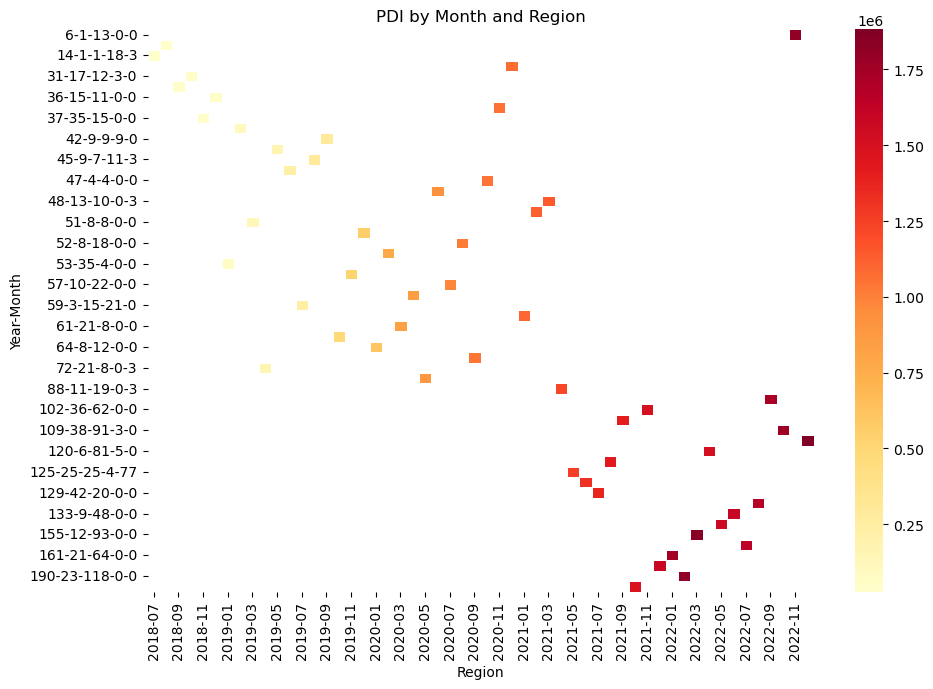

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
# Create a pivot table to aggregate the data by year, month, and region
pivot_table = pd.pivot_table(data_cut_new, values='Internal Displaced People',
                             index=["Violent events",
                                    "Demonstrations",
                                    "Non-violent actions",
                                    "Floods",
                                    "Storms"], 
                             columns=['EVENT_DATE'], 
                           
                            )

# Create a heatmap using seaborn
sns.heatmap(pivot_table, cmap='YlOrRd',linewidths=0.5)

# Set the plot title and axis labels
plt.title('PDI by Month and Region')
plt.xlabel('Region')
plt.ylabel('Year-Month')

# Show the plot
plt.show()


In [ ]:
import statsmodels.api as sm

In [18]:
#############################################################################################################

#                                working on six month for each year


############################################################################################################

In [19]:
#########################################

#              ARIMA 

#########################################

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = data_cut_new

data.rename(columns = {'EVENT_DATE':'Date'}, inplace = True)

data['Date'] = pd.to_datetime(data['Date'])
data = data[["Internal Displaced People"]]
data.head()

/tmp/ipykernel_2509891/1217369662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'EVENT_DATE':'Date'}, inplace = True)
/tmp/ipykernel_2509891/1217369662.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,Internal Displaced People
0,27347
1,27571
2,38982
3,39731
4,37367


<Axes: >

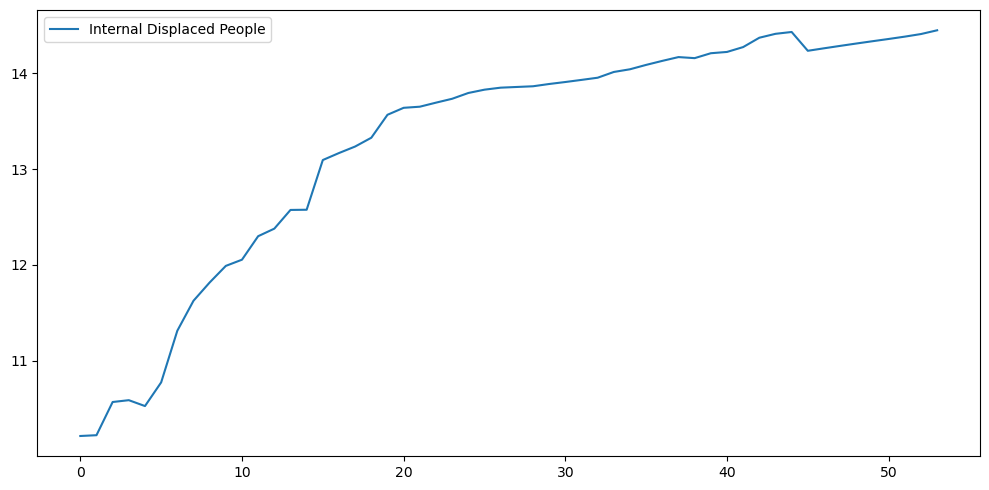

In [20]:
# log transformation

df = np.log(data)
df.plot()


In [21]:
# split the data into train and test set

msk = (df.index < len(df) - 30)

df_train = df[msk].copy()
df_test = df[~msk].copy()

/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


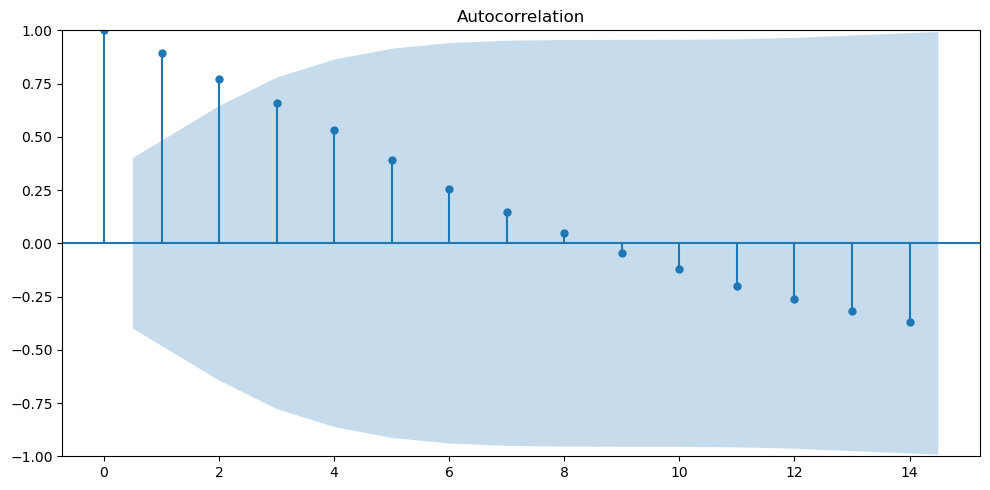

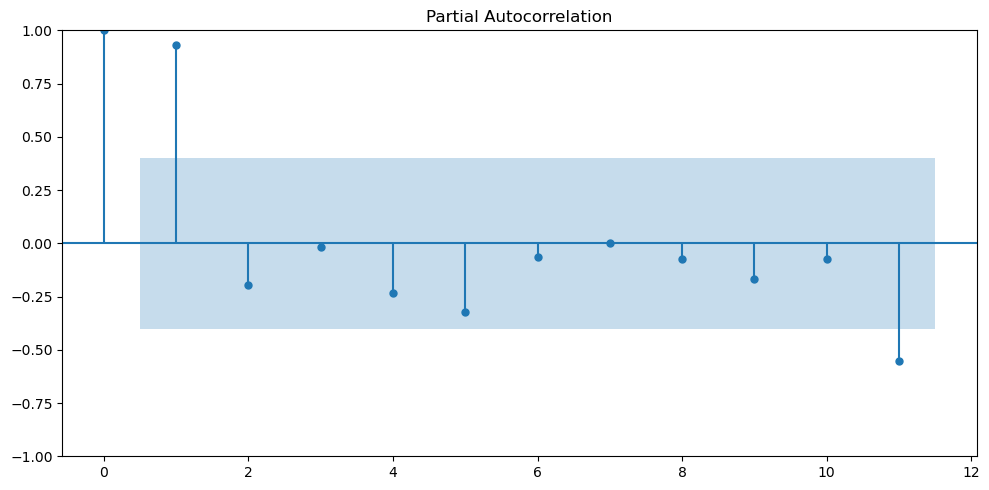

In [22]:
# check the stationarity

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train, lags=11)

In [23]:
#check the stationarity with dickey fuller test
from arch.unitroot import ADF

ADF(df_train, trend="c")

Test Statistic,-0.707
P-value,0.845
Lags,9


<Axes: >

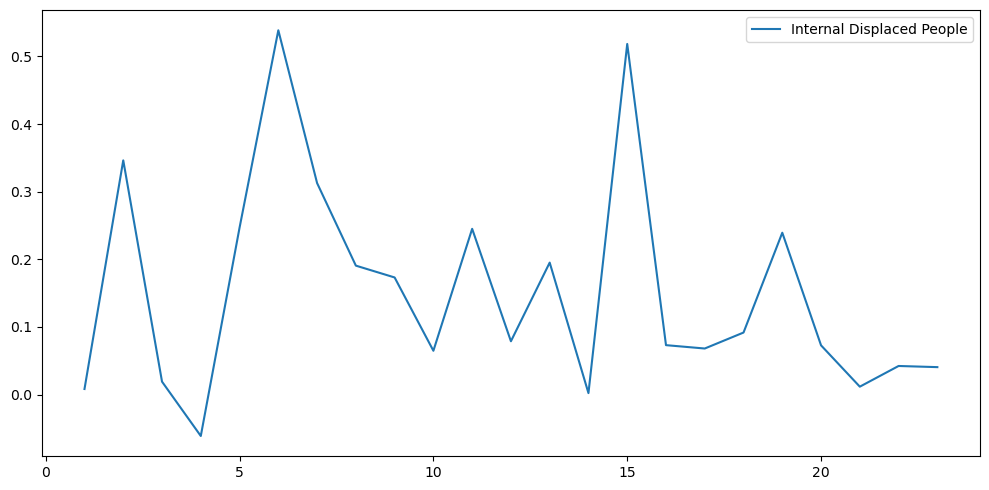

In [24]:
# transform my data to a stationary data use diff which substract
# first difference 
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

In [25]:
#check the stationarity with dickey fuller test
from arch.unitroot import ADF

ADF(df_train_diff, trend="c")

Test Statistic,0.949
P-value,0.994
Lags,9


<Axes: >

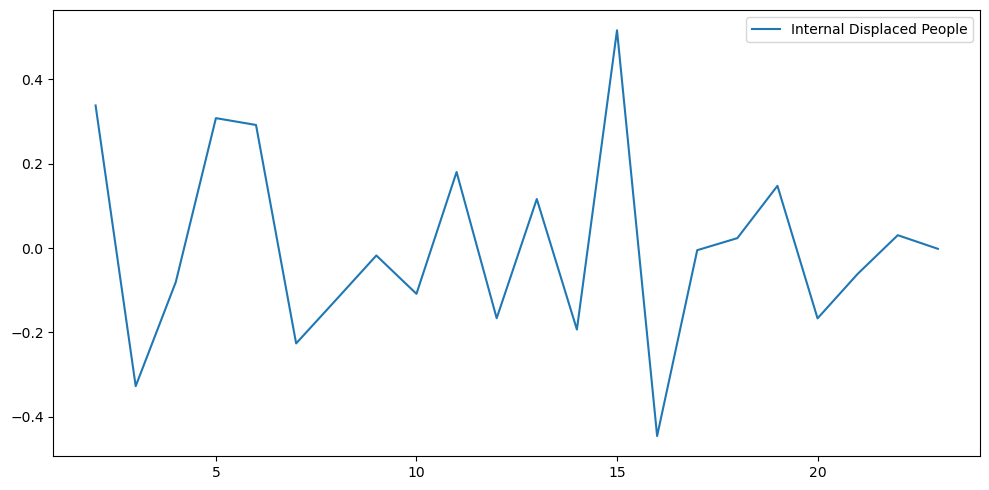

In [26]:
# transform my data to a stationary data use diff which substract
# second fifference
df_train_diff_diff = df_train_diff.diff().dropna()
df_train_diff_diff.plot()

In [27]:
#check the stationarity with dickey fuller test
from arch.unitroot import ADF

ADF(df_train_diff_diff, trend="c")

Test Statistic,-2.284
P-value,0.177
Lags,8


<Axes: >

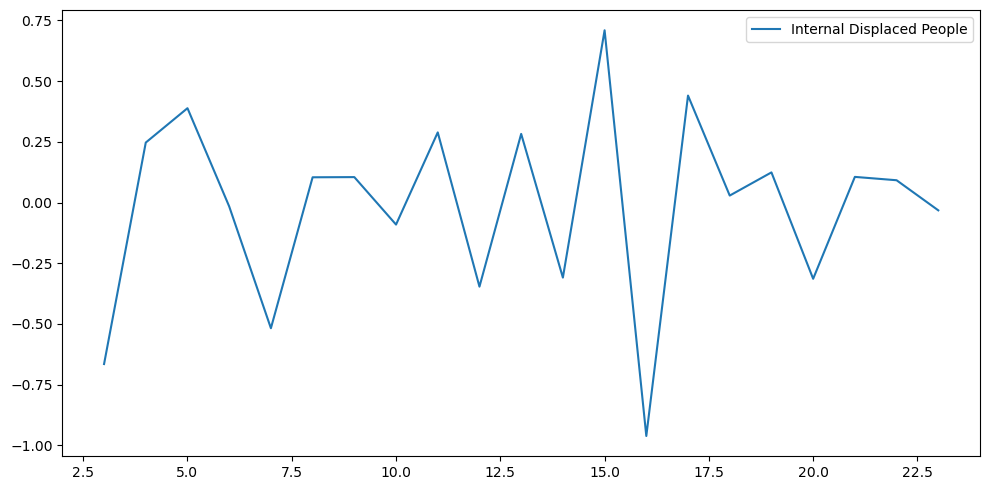

In [28]:
# transform my data to a stationary data use diff which substract
# third fifference
df_train_diff_diff_diff = df_train_diff_diff.diff().dropna()
df_train_diff_diff_diff.plot()

In [29]:
#check the stationarity with dickey fuller test
from arch.unitroot import ADF

ADF(df_train_diff_diff_diff, trend="c")

Test Statistic,-3.139
P-value,0.024
Lags,8


In [30]:
# insted of doing those difference we can directly use this package to have what we want
import pmdarima as pm
autoarima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
autoarima
autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  10.024
Date:                Fri, 31 Mar 2023   AIC                            -16.048
Time:                        17:47:47   BIC                            -13.777
Sample:                             0   HQIC                           -15.476
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1529      0.045      3.428      0.001       0.065       0.240
sigma2         0.0245      0.009      2.705      0.007       0.007       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.91   Prob(JB):                         0.11
Heteroskedasticity (H):               0.25   Skew:                             1.05
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Split data into training and testing sets
train = data[:'2022-05-01']
test = data['2022-06-01':]

# Fit ARIMA model to training data
model = ARIMA(train['Internal Displaced People'], order=(1, 3, 0))
model_fit = model.fit()

# Generate forecasts for the next six months
forecast = model_fit.forecast(steps=36)

# Print the forecasts
print(forecast)
mae = mean_absolute_error(test['Internal Displaced People'],
                          forecasts[:len(test['Internal Displaced People'])])
mse = mean_squared_error(test['Internal Displaced People'], 
                         forecasts[:len(test['Internal Displaced People'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internal Displaced People'] - forecasts[:len(test['Internal Displaced People'])]) / test['Internal Displaced People'])) * 100
accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)


#print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# Plot the forecasts and actual values

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(train['Internal Displaced People'], label='Training')
plt.plot(test['Internal Displaced People'], label='Testing')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

TypeError: cannot do slice indexing on RangeIndex with these indexers [2022-05-01] of type str

In [ ]:
#############################################################################################################

#                                working on six month for each year


############################################################################################################

In [ ]:
######################################

#              SARIMA

#####################################



# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Split data into training and testing sets
train = data.loc[:'2022-05-01']
test = data.loc['2022-06-01':]

# Fit SARIMA model to training data
model = SARIMAX(train['Internal Displaced People'], order=(1, 2, 0), seasonal_order=(1, 0, 1, 8))
model_fit = model.fit()

# Generate forecasts for the next 24 months
forecasts = model_fit.forecast(steps=56)

# Calculate evaluation metrics
mae = mean_absolute_error(test['Internal Displaced People'],
                          forecasts[:len(test['Internal Displaced People'])])
mse = mean_squared_error(test['Internal Displaced People'], 
                         forecasts[:len(test['Internal Displaced People'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internal Displaced People'] - forecasts[:len(test['Internal Displaced People'])]) / test['Internal Displaced People'])) * 100
accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and actual values
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(train['Internal Displaced People'], label='Training')
plt.plot(test['Internal Displaced People'], label='Testing')
plt.plot(forecasts, label='Forecast')
plt.legend()
plt.show()

print(forecasts)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = data_cut_new

# Prepare the data for LSTM
values = df.drop("EVENT_DATE", axis=1).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Define the training and testing data
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size, :]
test_data = scaled_values[train_size:, :]

# Define the input and output data for LSTM
def create_input_output(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :])
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 3
train_X, train_Y = create_input_output(train_data, look_back)
test_X, test_Y = create_input_output(test_data, look_back)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, df.shape[1]-1)))
model.add(Dense(df.shape[1]-1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the LSTM model
model.fit(train_X, train_Y, epochs=100, batch_size=16, verbose=2)

# Test the LSTM model
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse scaling for the predicted data
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Evaluate the LSTM model
train_rmse = np.sqrt(np.mean((train_predict - train_Y) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - test_Y) ** 2))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Forecast using the trained LSTM model
forecast_input = test_X[-1, :, :]
forecast_input = forecast_input.reshape(1, look_back, df.shape[1]-1)
forecast_output = model.predict(forecast_input)
forecast_output = scaler.inverse_transform(forecast_output)
print("Forecast output:", forecast_output)


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = data_cut_new

# Prepare the data for LSTM
values = df.drop("EVENT_DATE", axis=1).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Define the training and testing data
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size, :]
test_data = scaled_values[train_size:, :]

# Define the input and output data for LSTM
def create_input_output(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :])
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 3
train_X, train_Y = create_input_output(train_data, look_back)
test_X, test_Y = create_input_output(test_data, look_back)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, df.shape[1]-1)))
model.add(Dense(df.shape[1]-1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the LSTM model
model.fit(train_X, train_Y, epochs=100, batch_size=16, verbose=2)

# Test the LSTM model
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse scaling for the predicted data
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Evaluate the LSTM model
train_rmse = np.sqrt(np.mean((train_predict - train_Y) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - test_Y) ** 2))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Forecast using the trained LSTM model
forecast_input = test_X[-1, :, :]
forecast_input = forecast_input.reshape(1, look_back, df.shape[1]-1)
forecast_output = model.predict(forecast_input)
forecast_output = scaler.inverse_transform(forecast_output)
print("Forecast output:", forecast_output)


2023-03-31 17:47:49.058133: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 17:47:49.088815: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 17:47:49.230035: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 17:47:49.230685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 17:47:50.054794: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

KeyError: "['EVENT_DATE'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = data_cut_new

# Prepare the data for LSTM
values = df.drop("EVENT_DATE", axis=1).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Define the training and testing data
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size, :]
test_data = scaled_values[train_size:, :]

# Define the input and output data for LSTM
def create_input_output(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :])
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 3
train_X, train_Y = create_input_output(train_data, look_back)
test_X, test_Y = create_input_output(test_data, look_back)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, df.shape[1]-1)))
model.add(Dense(df.shape[1]-1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the LSTM model
model.fit(train_X, train_Y, epochs=100, batch_size=16, verbose=2)

# Test the LSTM model
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse scaling for the predicted data
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Evaluate the LSTM model
train_rmse = np.sqrt(np.mean((train_predict - train_Y) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - test_Y) ** 2))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Forecast using the trained LSTM model
last_input = test_X[-1, :, :]
forecast_input = last_input
forecast_input = forecast_input.reshape(1, look_back, df.shape[1]-1)
forecast_output = model.predict(forecast_input)
forecast_output = scaler.inverse_transform(forecast_output)
print("Forecast output:", forecast_output)

# Use the forecasted value to forecast a new value
next_input = np.concatenate((last_input[1:], forecast_output), axis=0)
next_input = next_input.reshape(1, look_back, df.shape[1]-1)
next_output = model.predict(next_input)
next_output = scaler.inverse_transform(next_output)
print("Next output:", next_output)




In [ ]:
# Define the number of months to forecast
forecast_months = 12

# Initialize the input sequence with the last look_back months of the test data
input_seq = test_X[-1, :, :]

# Define an empty array to store the predicted values
forecast = np.empty((forecast_months, df.shape[1]-1))

# Loop through each month to forecast
for i in range(forecast_months):
    # Reshape the input sequence for prediction
    forecast_input = input_seq.reshape(1, look_back, df.shape[1]-1)
    
    # Predict the next month's value
    forecast_output = model.predict(forecast_input)
    forecast_output = scaler.inverse_transform(forecast_output)
    
    # Store the predicted value in the forecast array
    forecast[i] = forecast_output
    
    # Append the predicted value to the input sequence and shift the input sequence by one month
    input_seq = np.concatenate((input_seq[1:, :], forecast_output), axis=0)

# Print the forecasted values
print("Forecast output:", forecast)

plt.plot(forecast)

In [ ]:
# Define the number of future months to forecast
num_months = 120

# Initialize the forecast input with the last month in the test data
forecast_input = test_X[-1, :, :]

# Initialize the forecast output
forecast_output = np.empty((num_months, df.shape[1]-1))

# Make recursive forecasts for each future month
for i in range(num_months):
    # Reshape the forecast input to match the model's input shape
    forecast_input = forecast_input.reshape(1, look_back, df.shape[1]-1)
    
    # Use the trained LSTM model to predict the next month's value
    forecast_step = model.predict(forecast_input)
    
    # Inverse scaling for the predicted value
    forecast_step = scaler.inverse_transform(forecast_step)
    
    # Store the predicted value in the forecast output
    forecast_output[i, :] = forecast_step
    
    # Update the forecast input with the predicted value for the next month
    forecast_input = np.concatenate((forecast_input[:, 1:, :], np.expand_dims(forecast_step, axis=0)), axis=1)
    
# Print the forecasted values
print("Recursive Forecast output:")
print(forecast_output)
plt.plot(forecast[-1])

/tmp/ipykernel_2509891/3242978895.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr(method="pearson")
/tmp/ipykernel_2509891/3242978895.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(),


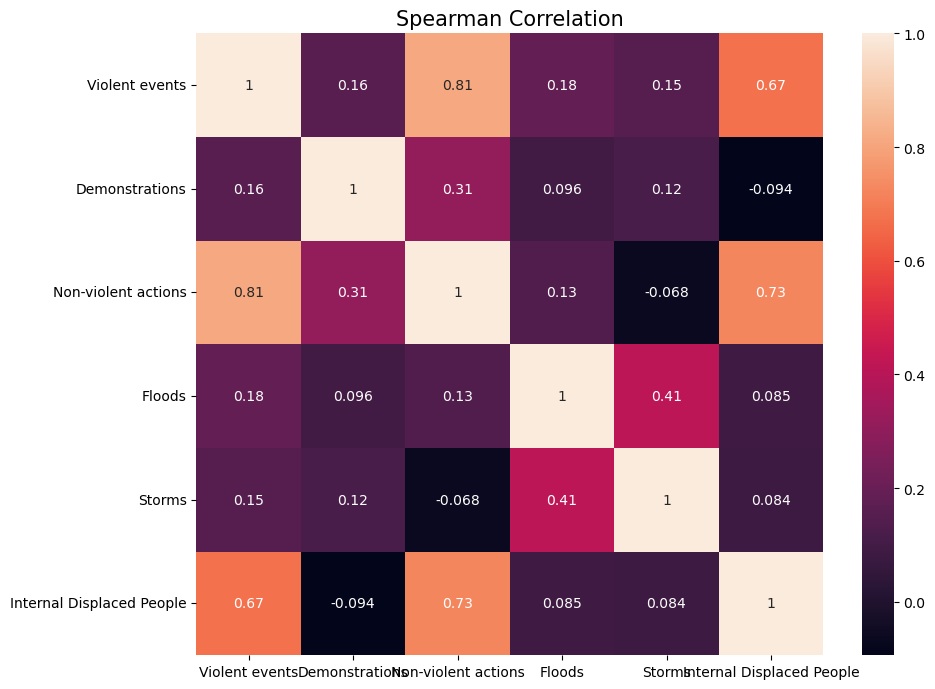

In [33]:
def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(10,7))
    heatmap = sns.heatmap(df.corr(), 
                       annot=True)
    plt.title("Spearman Correlation",fontsize= 15)
    plt.subplots_adjust(wspace=.7) 
    return(r)

r_simple=display_correlation(dry_season)

In [34]:
###################################################################


#                        VAR 

##################################################################

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

data_cut_new_var = data_cut_new[["Violent events","Demonstrations","Non-violent actions","Floods","Storms","Internal Displaced People"]]
df = data_cut_new_var

In [79]:
# causality test

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,Violent events_x,Demonstrations_x,Non-violent actions_x,Floods_x,Storms_x,Internal Displaced People_x
Violent events_y,1.0000,0.0016,0.0001,0.0049,0.0,0.0000
Demonstrations_y,0.0007,1.0000,0.0006,0.0048,0.0,0.0000
Non-violent actions_y,0.0000,0.0164,1.0000,0.0000,0.0,0.0000
Floods_y,0.0000,0.0000,0.0002,1.0000,0.0,0.0001
Storms_y,0.0001,0.3363,0.0015,0.6492,1.0,0.7474
Internal Displaced People_y,0.0249,0.2263,0.0000,0.0000,0.0,1.0000


In [80]:
# cointegration test

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Violent events ::  256.3     > 83.9383   =>   True
Demonstrations ::  147.0     > 60.0627   =>   True
Non-violent actions ::  90.46     > 40.1749   =>   True
Floods ::  40.92     > 24.2761   =>   True
Storms ::  18.91     > 12.3212   =>   True
Internal Displaced People ::  2.09      > 4.1296    =>   False


In [149]:
nobs = 7
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(47, 6)
(7, 6)


In [150]:
# check the stationarity

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  
    
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Violent events" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1797
 No. Lags Chosen       = 1
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.6823. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Demonstrations" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.426
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Non-violent actions" 
    -----------------------------------------------
 Null Hypothesis: Data ha

/tmp/ipykernel_2509891/1014859650.py:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


In [151]:
# 1st difference
df_differenced = df_train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Violent events" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.3343
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Demonstrations" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0278
 No. Lags Chosen       = 2
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Non-violent actions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Statio

/tmp/ipykernel_2509891/4283746134.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():


In [152]:
model = VAR(df_differenced)
x = model.select_order(maxlags=5)
x.summary()

/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,49.53,49.79*,3.255e+21,49.63
1,48.29,50.04,9.544e+20,48.93
2,47.57,50.83,5.231e+20,48.76
3,46.53,51.29,2.540e+20,48.26
4,45.54,51.81,1.962e+20,47.82
5,43.86*,51.64,1.789e+20*,46.69*


In [153]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, Mar, 2023
Time:                     19:12:57
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    51.6477
Nobs:                     42.0000    HQIC:                   47.7165
Log likelihood:          -1161.85    FPE:                1.60974e+20
AIC:                      45.4418    Det(Omega_mle):     9.76793e+18
--------------------------------------------------------------------
Results for equation Violent events
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                                9.751686         7.082130            1.377           0.169
L1.Violent events                   -0.429763         0.250775           -1.714        

In [154]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

Violent events : 2.04
Demonstrations : 1.63
Non-violent actions : 1.86
Floods : 1.51
Storms : 1.9
Internal Displaced People : 1.93


In [155]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 2.90000e+01,  2.00000e+00,  5.40000e+01,  0.00000e+00,
         0.00000e+00,  7.26280e+04],
       [-3.50000e+01, -1.10000e+01, -2.50000e+01,  0.00000e+00,
         0.00000e+00,  3.50150e+04],
       [-3.50000e+01, -6.00000e+00, -1.20000e+01,  5.00000e+00,
         0.00000e+00, -3.29286e+05],
       [ 2.70000e+01,  6.00000e+00, -1.40000e+01, -5.00000e+00,
         0.00000e+00,  3.98640e+04]])

In [156]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Violent events_2d,Demonstrations_2d,Non-violent actions_2d,Floods_2d,Storms_2d,Internal Displaced People_2d
47,-71.722646,-2.003351,18.311256,-20.587857,-3.843125,17845.095681
48,79.086147,-10.136701,-1.476562,4.452054,-8.521890,245226.203107
49,-7.210037,14.968074,6.933060,3.103911,27.173314,-54451.800323
50,36.251574,0.735265,-5.046094,1.189302,9.140528,-33671.414818
51,-40.694051,5.424949,-18.389253,-11.240793,-16.872935,-4995.642145
52,20.934643,-4.910271,10.906939,22.677491,-18.053915,142132.096072
53,-4.623478,-6.938961,10.050284,4.867513,6.604544,152834.080308


In [157]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ["Violent events_forecast","Demonstrations_forecast","Non-violent actions_forecast","Floods_forecast","Storms_forecast","Internal Displaced People_forecast"]]

,Violent events_forecast,Demonstrations_forecast,Non-violent actions_forecast,Floods_forecast,Storms_forecast,Internal Displaced People_forecast
47,102.277354,15.996649,71.311256,-25.587857,-3.843125,1.617585e+06
48,136.640855,9.856598,74.145949,-46.723661,-16.208140,1.920520e+06
49,163.794319,18.684620,83.913702,-64.755554,-1.399841,2.169004e+06
50,227.199357,28.247907,88.635361,-81.598145,22.548986,2.383816e+06
51,249.910344,43.236143,74.967767,-109.681528,29.624878,2.593632e+06
52,293.555975,53.314108,72.207113,-115.087421,18.646854,2.945581e+06
53,332.578127,56.453112,79.496742,-115.625800,14.273374,3.450364e+06


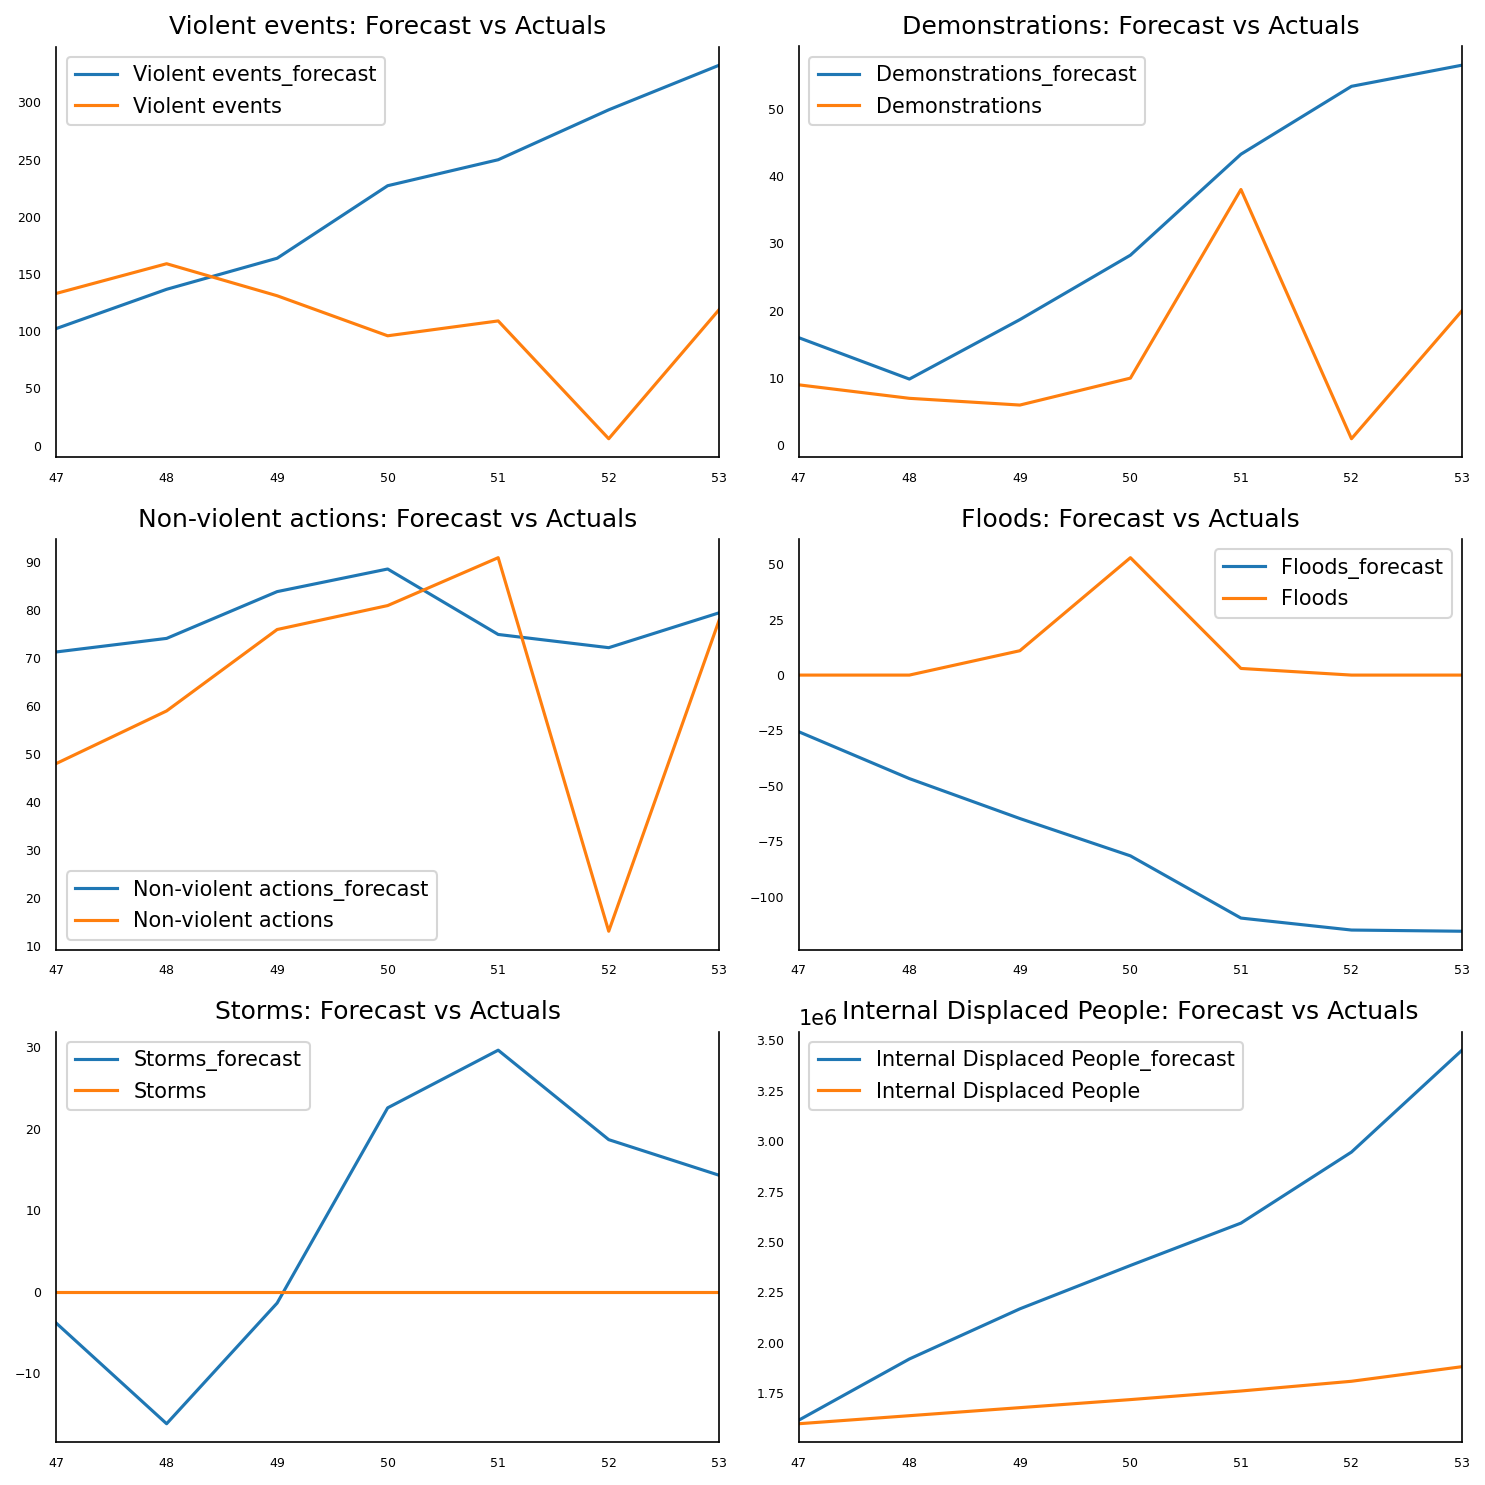

In [158]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [159]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    accuracy = 1-mape# minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax,"Accuracy"})

print('Forecast Accuracy of: "Violent events')
accuracy_prod = forecast_accuracy(df_results["Violent events_forecast"].values, df_test['Violent events'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print("\nForecast Accuracy of: Demonstrations")
accuracy_prod = forecast_accuracy(df_results["Demonstrations_forecast"].values, df_test["Demonstrations"])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Non-violent actions')
accuracy_prod = forecast_accuracy(df_results['Non-violent actions_forecast'].values, df_test['Non-violent actions'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: "Floods')
accuracy_prod = forecast_accuracy(df_results["Floods_forecast"].values, df_test["Floods"])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Storms')
accuracy_prod = forecast_accuracy(df_results["Storms_forecast"].values, df_test['Storms'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Internal Displaced People')
accuracy_prod = forecast_accuracy(df_results['Internal Displaced People_forecast'].values, df_test['Internal Displaced People'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))


Forecast Accuracy of: "Violent events
mape :  7.5717
me :  107.5652
mae :  122.7314
mpe :  7.4656
rmse :  154.8697
corr :  -0.5964
minmax :  0.4764

Forecast Accuracy of: Demonstrations
mape :  8.4856
me :  19.2556
mae :  19.2556
mpe :  8.4856
rmse :  25.7571
corr :  0.3551
minmax :  0.5429

Forecast Accuracy of: Non-violent actions
mape :  0.8129
me :  14.0968
mae :  18.6775
mpe :  0.7626
rmse :  25.7973
corr :  0.5918
minmax :  0.2467

Forecast Accuracy of: "Floods
mape :  inf
me :  -89.4371
mae :  89.4371
mpe :  -inf
rmse :  97.1045
corr :  -0.0036
minmax :  inf

Forecast Accuracy of: Storms
mape :  inf
me :  9.0919
mae :  15.2207
mpe :  nan
rmse :  17.7963
corr :  nan
minmax :  inf

Forecast Accuracy of: Internal Displaced People
mape :  0.399
me :  712563.901
mae :  712563.901
mpe :  0.399
rmse :  861892.7937
corr :  0.9983
minmax :  0.2603


/tmp/ipykernel_2509891/2878244025.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/tmp/ipykernel_2509891/2878244025.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/tmp/ipykernel_2509891/2878244025.py:13: RuntimeWarning: divide by zero encountered in divide
  minmax = 1 - np.mean(mins/maxs)
/home/adzavon/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/adzavon/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [160]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.stattools import adfuller
from numpy import log

# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.


temporal_series = data_cut.iloc[:,1:10]
result = adfuller(temporal_series.values.reshape(-1).tolist())
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.304486
p-value: 0.924867
	1%: -3.446
	5%: -2.868
	10%: -2.570


In [161]:
adf_c = ADF(temporal_series["Battles"].values.reshape(-1).tolist(), trend = 'ct')
adf_c.summary()

KeyError: 'Battles'

In [38]:
# adf_c = KPSS(temporal_series["Battles"].values.reshape(-1).tolist(), trend = 'c')
# adf_c.summary()

In [39]:
# adf_c = PhillipsPerron(temporal_series["Battles"].values.reshape(-1).tolist(), trend = 'c')
# adf_c.summary()

In [40]:
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import grangercausalitytests
# import numpy as np

In [41]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures
# from causalinference import CausalModel

# cm = CausalModel(Y = data_cut.Battles.values,
#                 D = data_cut.Riots.values,
#                 X = data_cut["Internal Displaced People"].values)
# cm.est_propensity_s()
# propensity = cm.propensity["fitted"]
# propensity 


In [42]:
# Importat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset

data_cut = pd.read_csv\
("/home/adzavon/Documents/MSC_Data_Analysis/merge for forecasting/second_to_forecast (another copy).csv",
header=0, infer_datetime_format=True,parse_dates=['EVENT_DATE'], index_col=['EVENT_DATE'])


# fill the missing values in "Floods","Storms" by "0"
data_cut[["Floods","Storms"]] = data_cut[["Floods","Storms"]].fillna("0")


# change "Floods","Storms" data type into intger

data_cut["Floods"] = data_cut["Floods"].astype(int)
data_cut["Storms"] = data_cut["Storms"].astype(int)

#linear method to fill the missang value
# data_cut = data_cut.fillna(method="ffill")
data_cut = data_cut.interpolate(method ='linear', limit_direction ='forward')
data_cut["Internal Displaced People"] = data_cut["Internal Displaced People"].astype(int)

In [43]:
# # check the distribution of my dataset

# from matplotlib import pyplot

# pyplot.figure()
# for i in range(len(data_cut.columns)):
#     # create subplot
#     pyplot.subplot(len(data_cut.columns), 1, i+1)
#     # get variable name
#     name = data_cut.columns[i]
#     # create histogram
#     data_cut[name].hist(bins=100)
#     # set title
#     pyplot.title(name, y=0, loc='right')
#     # turn off ticks to remove clutter
#     pyplot.yticks([])
#     pyplot.xticks([])
# pyplot.show()

In [44]:
# # yearly line plots for power usage dataset



# years = ['2018', '2019', '2020', '2021','2022']
# pyplot.figure()
# for i in range(len(years)):
#     # prepare subplot
#     ax = pyplot.subplot(len(years), 1, i+1)
#     # determine the year to plot
#     year = years[i]
#     # get all observations for the year
#     result = data_cut[str(year)]
#     # plot the active power for the year
#     pyplot.plot(result['Internal Displaced People'])
#     # add a title to the subplot
#     pyplot.title(str(year), y=0, loc='left')
#     # turn off ticks to remove clutter
#     pyplot.yticks([])
#     pyplot.xticks([])
# pyplot.show()

In [45]:
# # histogram plot for each variable


# pyplot.figure()
# for i in range(len(data_cut.columns)):
#     # create subplot
#     pyplot.subplot(len(data_cut.columns), 1, i+1)
#     # get variable name
#     name = data_cut.columns[i]
#     # create histogram
#     data_cut[name].hist(bins=100)
#     # set title
#     pyplot.title(name, y=0, loc='right')
#     # turn off ticks to remove clutter
#     pyplot.yticks([])
#     pyplot.xticks([])
# pyplot.show()

In [46]:
# ###################################################################
# ?DRLearner

In [47]:
# from sklearn.linear_model import LassoCV
# from sklearn.model_selection import train_test_split
# #from sklearn.model_selection import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor   
# from econml.dr import DRLearner
# # Load data

# X = data_cut.iloc[:, 1:8].values
# Y = data_cut.iloc[:, -1].values

# # Split data into training and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# # Estimate nuisance functions
# model_T_X = DRLearner(model_propensity=None, model_regression=None, model_final=RandomForestRegressor())
# model_Y_X = DRLearner(model_propensity=RandomForestRegressor(), model_regression=None, model_final=RandomForestRegressor())
# model_T_X.fit(Y_train, T_train, X_train)
# model_Y_X.fit(Y_train, X_train, T_train)

# # Estimate treatment effect
# model_learner = DRLearner(model_y=RandomForestRegressor(), model_t=RandomForestRegressor(), model_final=RandomForestRegressor())
# model_learner.fit(Y_train, T_train, X_train)

# # Test for causality
# Y_pred = model_learner.predict(Y_test, T_test, X_test)


In [48]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # Step 1: Split data into train and test sets
# train_size = int(len(data_cut) * 0.8)
# train_data = data_cut[:train_size]
# test_data = data_cut[train_size:]

# # Step 2: Define treatment and outcome variables
# treatment_var = data_cut.iloc[:, 1:8].values
# outcome_var = data_cut.iloc[:, -1].values

# # Step 3: Preprocess data
# # For example, you may need to difference your data to remove trends or seasonalities

# # Step 4: Use double machine learning to estimate causal effect
# # Split data into X (predictors) and y (outcome)
# X_train = train_data.drop(columns=[outcome_var])
# y_train = train_data[outcome_var]
# X_test = test_data.drop(columns=[outcome_var])
# y_test = test_data[outcome_var]

# # Standardize X
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define machine learning models
# treatment_model = RandomForestRegressor()
# outcome_model = LinearRegression()

# # Train treatment model
# treatment_model.fit(X_train, train_data[treatment_var])

# # Get predicted values of treatment variable for train and test sets
# train_data["predicted_treatment"] = treatment_model.predict(X_train)
# test_data["predicted_treatment"] = treatment_model.predict(X_test)

# # Train outcome model
# outcome_model.fit(train_data[["predicted_treatment"]], y_train)

# # Get predicted values of outcome variable for train and test sets
# train_data["predicted_outcome"] = outcome_model.predict(train_data[["predicted_treatment"]])
# test_data["predicted_outcome"] = outcome_model.predict(test_data[["predicted_treatment"]])

# # Calculate causal effect
# causal_effect = np.mean(test_data[outcome_var] - test_data["predicted_outcome"])

# # Step 5: Evaluate model performance
# mse = mean_squared_error(y_test, test_data["predicted_outcome"])


In [49]:
# data_cut["violences"] = data_cut["Battles"] + data_cut["Explosions/Remote violence"] + data_cut["Violence against civilians"]
# data_cut["manifestation"] = data_cut["Protests"] + data_cut["Strategic developments"] + data_cut["Riots"]
# data_cut["Extreme Events"] = data_cut["Floods"] + data_cut["Storms"]

# data_cut

In [50]:
from sklearn import linear_model

x = data_cut.iloc[:,1:9]
y = data_cut.iloc[:,-1]

model = linear_model.LinearRegression()
results = model.fit(x, y)

print(results.intercept_, results.coef_)


-2.3283064365386963e-10 [ 6.64360278e-12 -1.13612175e-11  1.10469026e-12 -5.10267859e-12
 -1.69260475e-12  1.13884081e-12 -2.11160329e-12  1.00000000e+00]


In [51]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Internal Displaced People   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 2.175e+31
Date:                       Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                               17:48:00   Log-Likelihood:                 1105.5
No. Observations:                         54   AIC:                            -2193.
Df Residuals:                             45   BIC:                            -2175.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [52]:
d

NameError: name 'd' is not defined

In [53]:
from scipy.stats import f_oneway

p1 = f_oneway(data_cut["Battles"],data_cut["Internal Displaced People"])
p2 = f_oneway(data_cut["Explosions/Remote violence"],data_cut["Internal Displaced People"])
p3 = f_oneway(data_cut["Protests"],data_cut["Internal Displaced People"])
# f_oneway(data_cut["Explosions/Remote violence"],data_cut["Internal Displaced People"])
# f_oneway(data_cut["Explosions/Remote violence"],data_cut["Internal Displaced People"])
# f_oneway(data_cut["Explosions/Remote violence"],data_cut["Internal Displaced People"])
# f_oneway(data_cut["Explosions/Remote violence"],data_cut["Internal Displaced People"])
p2

F_onewayResult(statistic=126.798702433528, pvalue=8.093510490524264e-20)

In [54]:
# #ax = sns.boxplot(x = data_cut["EVENT_DATE"], y = data_cut["Floods"])

# #create a box plot

# fig = sns.boxplot(data_cut)

# fig.show()

In [55]:
# fig,ax = plt.subplots(figsize = (20,10))

# dta = data_cut[["Battles","Explosions/Remote violence","Protests","Riots","Strategic developments","Violence against civilians","Floods","Storms"]]
# ticks = ["Battles","Explosions/Remote violence","Protests","Riots","Strategic developments","Violence against civilians","Floods","Storms"]
# ax = sns.boxplot(data = dta,dodge=False)
# ax2 = ax.twinx()
# ax2.boxplot(df9,positions=[8])

In [56]:
# data_cut

In [57]:
# fig, ax = plt.subplots(figsize=(20, 10))

# dta = data_cut[:,-1]
# ticks = ["Battles", "Explosions/Remote violence", "Protests", "Riots", "Strategic developments", "Violence against civilians", "Floods", "Storms"]

# # Set the x-axis labels to the column names
# ax = sns.boxplot(data=dta, dodge=False, labels=ticks)

# # Add the second y-axis for "IDP"
# ax2 = ax.twinx()
# ax2.boxplot(data_cut["IDP"], positions=[8], widths=0.3, patch_artist=True)
# ax2.set_ylabel("IDP")

# plt.show()


In [58]:
# import pandas as pd
# from matplotlib import pyplot as plt

# plt.rcParams["figure.figsize"] = [10.00, 7.0]
# plt.rcParams["figure.autolayout"] = True



# ax = data_cut.plot(x='EVENT_DATE', y='Floods',label = "Floods")
# data_cut.plot(ax=ax, x='EVENT_DATE', y='Storms',label = "Storms")

# #ax.bar(x, y1, color = 'g')
# #ax.bar(data_cut['EVENT_DATE'], data_cut['Floods'])
# #ax.bar(data_cut['EVENT_DATE'], data_cut['Storms'])


# ax.set_xlabel("Date",fontsize=10)
# ax.set_ylabel("Number of conflicts",fontsize=10)


# ax2=ax.twinx()
# # make a plot with different y-axis using second axis object
# ax2.plot(data_cut['EVENT_DATE'], data_cut['Internal Displaced People'],marker="o",label ='Internal Displaced People' )
# ax2.set_ylabel("Number of Internal Displaced People",fontsize=10)
# plt.title('Evolution of conflicts and Internal dispalacement from 2018 to 2022')

# plt.show()




# dt = []

# for d in dfa:
#     i = data_cut[d].values
#     dt.append(i)
# df1,df2,df3,df4,df5,df6,df7,df8


# # plt.figure(figsize=(20,7))
# # plt.boxplot([df1,df2,df3,df4,df5,df6,df7,df8], labels=dfa)

# import pandas as pd
# from matplotlib import pyplot as plt

# fig,ax = plt.subplots(figsize = (20,10))

# ax = plt.boxplot([df1,df2,df3,df4,df5,df6,df7,df8], labels=dfa, )



# ax2=ax.twinx()
# # make a plot with different y-axis using second axis object
# ax2.boxplot(data_cut['Internal Displaced People'],)
# ax2.set_ylabel("Number of Internal Displaced People",fontsize=10)
# ax2.legend(loc=15)


# plt.tight_layout()
# plt.savefig("plot.png")
# plt.show()


In [59]:
# sns.pairplot(data_cut)

In [60]:
# # Norm

# dta = data_cut[["Battles","Explosions/Remote violence","Protests","Riots","Strategic developments","Violence against civilians","Floods","Storms","Internal Displaced People"]]


# # copy the data
# df_max_scaled = dta.copy()
  
# # apply normalization techniques
# for column in df_max_scaled.columns:
#     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# # view normalized data
# display(df_max_scaled)

# sns.pairplot(df_max_scaled)


# # copy the data
# df_z_scaled = dta.copy()
  
# # apply normalization techniques
# for column in df_z_scaled.columns:
#     df_z_scaled[column] = (df_z_scaled[column] -
#                            df_z_scaled[column].mean()) / df_z_scaled[column].std()    

# # view normalized data   
# sns.pairplot(df_z_scaled)

/home/adzavon/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:482: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/home/adzavon/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


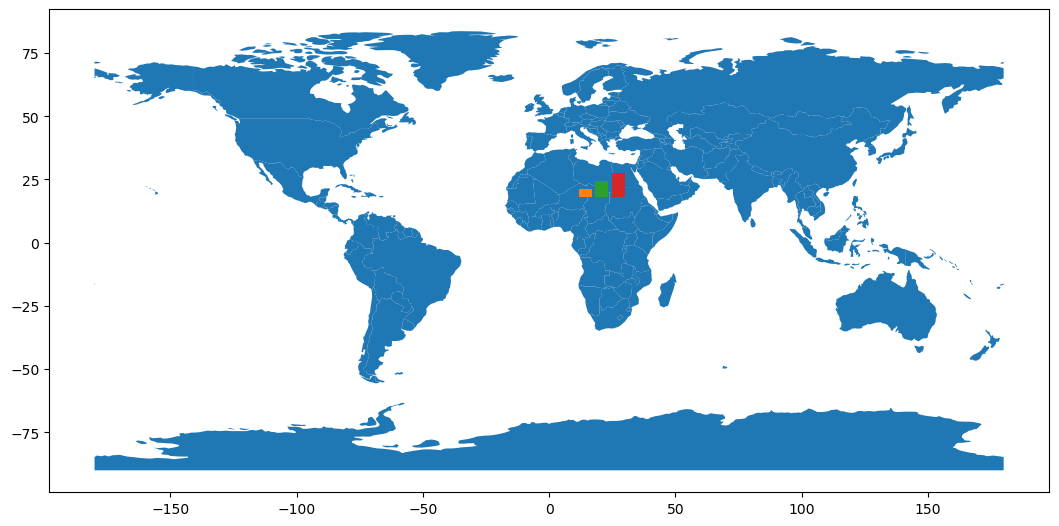

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig = plt.figure()
ax_map = fig.add_axes([0, 0, 1, 1])
world.plot(ax=ax_map)
lat, lon = 19.432608, 10
ax_bar = fig.add_axes([0.5*(1+lon/180) , 0.5*(1+lat/90) , 0.05, 0.05])
ax_bar.bar([1, 2, 3], [1, 2, 3], color=['C1', 'C2', 'C3'])
ax_bar.set_axis_off()
plt.show()



In [62]:
import geopandas
import fiona
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from shapely.geometry import Point
import pandas
from matplotlib_scalebar.scalebar import ScaleBar
import pyproj
from pyproj import Proj, transform, CRS


fichier_dist="/home/adzavon/Documents/MSC_Data_Analysis/study area maping/gadm36_BFA_shp/gadm36_BFA_shp/gadm36_BFA_1.shp"
output_map="C:/output/_test.png"



# fig,ax = plt.subplots(figsize=(10,7))

#crs=PROJ() 
fig = plt.figure(figsize=(15,15))  
prov_shp=geopandas.read_file(fichier_dist )
prov_shp.set_crs(epsg=4326, inplace=True)
print(prov_shp.crs)
crs=CRS("epsg:3857")
prov_shp = prov_shp.to_crs(crs)
axies1 = fig.add_axes([0.1,0.1,0.8,0.8])
axies2 = fig.add_axes([0.12, 0.68, 0.2, 0.1])
ax=prov_shp.boundary.plot(color="black", linewidth=0.25, ax=axies1, )
ax.add_artist(ScaleBar(
    dx=1,
    units="km",
     dimension="si-length",
     length_fraction=0.25,
    scale_formatter=lambda value, unit: f' {value * 1000} km ',
    location='lower left'
))

x, y, arrow_length = 0.95, 1, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.set_yticks([])
ax.set_xticks([])


ModuleNotFoundError: No module named 'matplotlib_scalebar'

In [63]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
df = data_cut

# Define the number of input and output steps
n_steps_in = 3
n_steps_out = 1

# Define the number of input and output features
n_features_in = df.shape[1]
n_features_out = df.shape[1]

# Prepare the data for training
X = []
y = []
for i in range(n_steps_in, len(df)-n_steps_out+1):
    X.append(df.iloc[i-n_steps_in:i, :].values)
    y.append(df.iloc[i:i+n_steps_out, :].values)
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
n_train = int(len(X)*0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Define the model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features_in)))
model.add(Dense(n_features_out))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE:', mse)

# Use the model to predict the values for January 2019
X_new = df.iloc[-n_steps_in:, :].values.reshape(1, n_steps_in, n_features_in)
y_pred = model.predict(X_new)
print('Predicted values for January 2019:\n', y_pred)
data_cut.iloc[:,1:]

MSE: 17616861184.0
1/1 [==============================] - 0s 106ms/step
Predicted values for January 2019:
 [[ 1.1634733e+03  1.7545056e+02  2.4996357e+03  6.9447502e+01
  -1.3987084e+03  2.1634658e+03 -1.9658212e+03  2.3457656e+03
   1.4424681e+06]]


,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,Floods,Storms,Internal Displaced People
EVENT_DATE,,,,,,,,
2018-07-01,0,1,0,1,9,18,3,27347
2018-08-01,3,3,2,3,3,211,4,27571
2018-09-01,5,4,2,11,20,33,0,38982
2018-10-01,3,16,1,12,19,3,0,39731
2018-11-01,2,24,11,15,20,0,0,37367
2018-12-01,4,11,4,11,21,0,0,47826
2019-01-01,3,32,3,4,41,0,0,81964
2019-02-01,3,11,5,16,17,0,0,112057
2019-03-01,6,5,3,8,31,0,0,135589


In [64]:
import statsmodels.api as sm


data = data_cut_new.iloc[:,1:]
for var in data.columns:
    result = sm.tsa.stattools.adfuller(data[var])
    print(f'{var} ADF Statistic: {result[0]:.4f}')
    print(f'{var} p-value: {result[1]:.4f}')
    print(f'{var} Critical Values: {result[4]}')


Violent events ADF Statistic: -1.7903
Violent events p-value: 0.3853
Violent events Critical Values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
Demonstrations ADF Statistic: -6.4701
Demonstrations p-value: 0.0000
Demonstrations Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Non-violent actions ADF Statistic: -1.2927
Non-violent actions p-value: 0.6325
Non-violent actions Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
Floods ADF Statistic: -5.9900
Floods p-value: 0.0000
Floods Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Storms ADF Statistic: -5.6984
Storms p-value: 0.0000
Storms Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Internal Displaced People ADF Statistic: -0.3165
Internal Displaced People p-value: 0.9231
Internal Displaced People Critical Value

In [46]:
from arch.unitroot import ADF

ADF(data_cut_new.Demonstrations, trend="c")

Test Statistic,-6.470
P-value,0.000
Lags,0


In [47]:
from arch.unitroot import ADF

ADF(data_cut["Violent events"].values.reshape(-1).tolist(), trend="c")

KeyError: 'Violent events'

In [ ]:
from arch.unitroot import ADF

ADF(data_cut["Non-violent actions"].values.reshape(-1).tolist(), trend="c")

In [ ]:
from arch.unitroot import ADF

ADF(data_cut.Storms, trend="c")

In [ ]:
from arch.unitroot import ADF

ADF(data_cut.Floods, trend="c")

In [ ]:
from arch.unitroot import ADF

ADF(data_cut["Internal Displaced People"].values.reshape(-1).tolist(), trend="c")

In [ ]:
# Choose the lag order using the AIC criterion
model = sm.tsa.ARDL(data['Internal Displaced People'], 
                    exog=data.drop('Internal Displaced People', 
                                   axis=1), 
                    lags=1)
result = model.fit()
print(result.summary())

In [ ]:
# Choose the lag order using the AIC criterion
model = sm.tsa.ARDL(data['Non-violent actions'], 
                    exog=data.drop('Non-violent actions', 
                                   axis=1), 
                    lags=1)
result = model.fit()
print(result.summary())

In [ ]:
# Test for cointegration using the Engle-Granger test
eg_test = sm.tsa.coint(data.drop('Internal Displaced People', axis=1),
                       data['Internal Displaced People'], 
                       trend='c', method='eg')
print(f'Engle-Granger Test Statistic: {eg_test[0]:.4f}')
print(f'p-value: {eg_test[1]:.4f}')

In [ ]:
# Split the data into train and test sets
train_data = data.iloc[:len(data)-5, :]
test_data = data.iloc[len(data)-5:, :]

In [ ]:
# Make forecasts on the test set
future_exog = test_data.drop('Internal Displaced People', axis=1)
forecast = result.predict(start=test_data.index[0], end=test_data.index[-1], exog=future_exog)

# Evaluate the performance of the model
mse = np.mean((test_data['Internal Displaced People'] - forecast)**2)
mae = np.mean(np.abs(test_data['Internal Displaced People'] - forecast))
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data['Internal Displaced People'] - forecast) / test_data['Internal Displaced People'])) * 100

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Percentage Error: {mape:.4f}%')

# Use the forecasted value of IDP in a new forecast
new_data = pd.concat([data, forecast.rename('Internal Displaced People_forecast')], axis=0)
new_data[new_data.columns.drop([col for col in new_data.columns if '_forecast' not in col])] = np.nan # Initialize forecast columns for the independent variables


In [ ]:
for i in range(len(forecast)):
    row = new_data.iloc[-1, :]
    row[new_data.columns.drop([col for col in new_data.columns if '_forecast' not in col])] = test_data.iloc[i, :].values
    new_data = new_data.append(row, ignore_index=True)

new_model = sm.tsa.ARDL(new_data['Internal Displaced People'], exog=new_data.drop('Internal Displaced People', axis=1), maxlags=3)
new_result = new_model.fit()
print(new_result.summary())

# Test for cointegration using the Engle-Granger test
new_eg_test = sm.tsa.coint(new_data.drop('Internal Displaced People', axis=1), new_data['Internal Displaced People'], trend='c', method='eg')
print(f'Engle-Granger Test Statistic: ')

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
# Read in the data
data = data_cut[:,1:]

# Select predictor variables
predictors = ['Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians', 'Floods', 'Storms']

# Split the data into target and predictors
X = data[predictors].values
y = data['Internal Displaced People'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


InvalidIndexError: (slice(None, None, None), slice(1, None, None))

In [ ]:
# Define the ARDL model
model = sm.tsa.ARDL(y_train, X_train, maxlag=3)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


In [50]:
# Make predictions on the test set
y_pred = results.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Append the predicted values to the original data
data['Predicted Internal Displaced People'] = np.nan
data.iloc[len(X_train):]['Predicted Internal Displaced People'] = y_pred

# Define the number of future time periods to forecast
n_periods = 144

# Use the model to make forecasts
forecast = results.predict(X, start=len(X), end=len(X)+n_periods-1, exog=X)
forecast_index = pd.date_range(start='2019-12-01', periods=n_periods, freq='M')
forecast = pd.Series(forecast, index=forecast_index)


In [ ]:
import pandas as pd

# Lire le fichier csv
df = pd.read_csv('/home/adzavon/Documents/MSC_Data_Analysis/map_for conflicts/conflicts_true (copy).csv')

# map the event types to the new categories
event_mapping = {
    'Battles': 'Violent events',
    'Violence against civilians': 'Violent events',
    'Explosions/Remote violence': 'Violent events',
    'Protests': 'Demonstrations',
    'Riots': 'Demonstrations',
    'Strategic developments': 'Non-violent actions'
}
df['EVENT_TYPE'] = df['EVENT_TYPE'].map(event_mapping)

# group the data by the new categories and sum the values
sum_df = df.groupby(['Year', 'Region', 'EVENT_TYPE'], as_index=False)['SUM_CONFLICTS'].sum()
sum_df.to_csv("/home/adzavon/Documents/MSC_Data_Analysis/map_for conflicts/new_data_for works.csv")

In [51]:
dataset = pd.read_csv("/home/adzavon/Documents/MSC_Data_Analysis/map_for conflicts/new_data_for works.csv")
dataset['Region'] = dataset['Region'].replace(['Hauts-Bassins'], 'Haut-Bassins')
dataset['Region'] = dataset['Region'].replace(['sahel'], 'Sahel')
dataset['Region'] = dataset['Region'].replace(['boucle du Mouhoun'], 'Boucle du Mouhoun')

# merge shapefile and csv
shapefile = gpd.read_file("/home/adzavon/Documents/MSC_Data_Analysis/study area maping/gadm36_BFA_shp/gadm36_BFA_shp/gadm36_BFA_1.shp")
shapefile_map = shapefile[["NAME_1","geometry"]]
merged = shapefile_map.merge(dataset, left_on="NAME_1", right_on="Region")
simplify_merge_old = merged[["Year","Region","EVENT_TYPE","SUM_CONFLICTS","geometry"]]
simplify_merge = simplify_merge_old.set_index("Region")
simplify_merge.to_file

<bound method GeoDataFrame.to_file of                    Year           EVENT_TYPE  SUM_CONFLICTS  \
Region                                                        
Boucle du Mouhoun  2018       Demonstrations              6   
Boucle du Mouhoun  2018  Non-violent actions              1   
Boucle du Mouhoun  2018       Violent events             15   
Boucle du Mouhoun  2019       Demonstrations              6   
Boucle du Mouhoun  2019  Non-violent actions              5   
...                 ...                  ...            ...   
Sud-Ouest          2021  Non-violent actions              4   
Sud-Ouest          2021       Violent events             13   
Sud-Ouest          2022       Demonstrations              3   
Sud-Ouest          2022  Non-violent actions             12   
Sud-Ouest          2022       Violent events             37   

                                                            geometry  
Region                                                                


In [52]:
data_cut_new.iloc[:-6,:]

,EVENT_DATE,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
0,2018-07,14,1,1,18,3,27347
1,2018-08,13,5,3,211,4,27571
2,2018-09,33,6,11,33,0,38982
3,2018-10,31,17,12,3,0,39731
4,2018-11,37,35,15,0,0,37367
5,2018-12,36,15,11,0,0,47826
6,2019-01,53,35,4,0,0,81964
7,2019-02,40,16,16,0,0,112057
8,2019-03,51,8,8,0,0,135589
9,2019-04,72,21,8,0,3,161217


In [67]:
from sklearn.preprocessing import StandardScaler
from numpy import array




df = data_cut_new
train_date = pd.to_datetime(df["EVENT_DATE"])

cols = list(df)[1:6]
df_for_training = df[cols].astype(float)


scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainx = []
trainy = []

n_future = 1
n_past = 12

for i in range(n_past, len(df_for_training_scaled)- n_future+1):
    trainx.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]])
    trainy.append(df_for_training_scaled[i + n_future  - 1:i + n_future,0])

trainx,trainy = np.array(trainx),np.array(trainy)

print("trainx shape == {}.",format(trainx.shape))
print("trainy shape == {}.",format(trainy.shape))

trainx shape == {}. (42, 12, 5)
trainy shape == {}. (42, 1)


In [74]:
from keras.layers import Dropout


model = Sequential()
model.add(LSTM(64, activation="relu",
               input_shape=(trainx.shape[1], trainx.shape[2]),
               return_sequences=True))
model.add(Dense(32, activation="relu"))  # Add dense layer separately with activation
model.add(Dropout(0.2))
model.add(Dense(trainy.shape[1]))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 12, 64)            17920     
                                                                 
 dense_8 (Dense)             (None, 12, 32)            2080      
                                                                 
 dropout_2 (Dropout)         (None, 12, 32)            0         
                                                                 
 dense_9 (Dense)             (None, 12, 1)             33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________


In [86]:
# fit the model

history = model.fit(trainx,trainy,epochs = 20,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/20
3/3 [==============================] - 0s 30ms/step - loss: 0.1929 - val_loss: 2.1504
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 0.1837 - val_loss: 2.0988
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 0.2027 - val_loss: 2.0655
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1740 - val_loss: 1.9950
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 0.1922 - val_loss: 1.9899
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 0.2015 - val_loss: 2.0247
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 0.1804 - val_loss: 2.0951
Epoch 8/20
3/3 [==============================] - 0s 14ms/step - loss: 0.1960 - val_loss: 2.1228
Epoch 9/20
3/3 [==============================] - 0s 13ms/step - loss: 0.1809 - val_loss: 2.0996
Epoch 10/20
3/3 [==============================] - 0s 13ms/step - loss: 0.1860 - val_loss: 2.0744
Epoch 11/20
3/3 [============

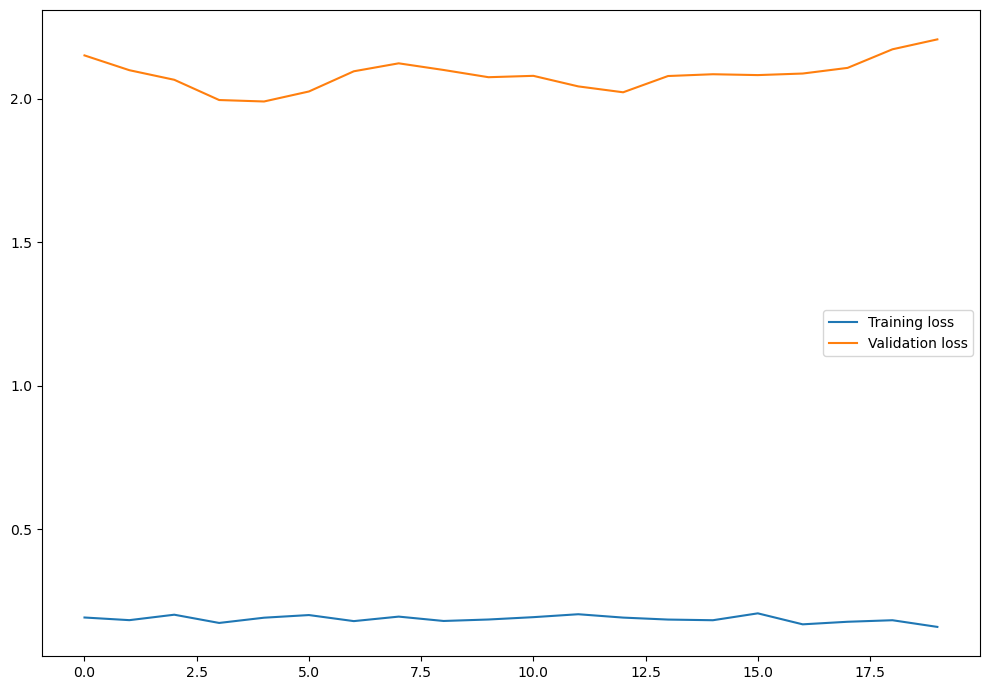

In [89]:
plt.plot(history.history["loss"],label = "Training loss")
plt.plot(history.history["val_loss"],label = "Validation loss")
plt.legend()

In [102]:
# Check the shape of forecast_copies_2d
print(forecast_copies_2d.shape)

# Reshape forecast_copies_2d to match the shape of the original data
n_cols = df_for_training.shape[1]
forecast_copies_2d = forecast_copies_2d.reshape(-1, n_cols)

# Use the scaler to inverse transform the data
y_pred_future = scaler.inverse_transform(forecast_copies_2d)[:, 0]

forecast_date = []
for time_i in forecast_periods_date:
    forecast_date.append(time_i.date())

df_forecast = pd.DataFrame({"Date":np.array(forecast_date),"Open":y_pred_future})
df_forecast["Date"] = pd.to_datetime(df_forecast["Date"])

original = df[["Date","Open"]]
original["Date"] = pd.to_datetime(original["Date"])
original = original.loc[original["Date"] > "2020-12-1"]

(504, 5)


ValueError: All arrays must be of the same length

In [104]:
print(len(forecast_date))
print(len(y_pred_future))


90
504


In [55]:
# Load the data
df = data_cut_new.copy()

# Convert the date column to datetime and set it as the index
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], format='%Y-%m')
df = df.set_index('EVENT_DATE')

# Create a new dataframe with only the Internal Displaced People column
df_idp = df[['Internal Displaced People']]

# Split the data into training and testing sets
train_size = int(len(df_idp) * 0.8)
train, test = df_idp.iloc[:train_size], df_idp.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Define the number of time steps and features
n_steps = 12
n_features = 1

# Create a function to prepare the data for the LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of the sequence
        end_ix = i + n_steps
        # Check if we have reached the end of the sequence
        if end_ix > len(data)-1:
            break
        # Gather input and output parts of the sequence
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the training and testing data for the LSTM
X_train, y_train = prepare_data(train_scaled, n_steps)
X_test, y_test = prepare_data(test_scaled, n_steps)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(1)
])

# Compile the LSTM model
model.compile(optimizer='adam', loss='mse', metrics=['mae'], run_eagerly=True)

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=1, validation_data=(X_test, y_test))

# Evaluate the LSTM model on the testing data
evaluation = model.evaluate(X_test, y_test, verbose=0)

if len(evaluation) == 0:
    print('No evaluation metrics returned. This could be because there are no samples in the test data.')
else:
    print('Test loss:', evaluation[0])
    print('Test mae:', evaluation[1])

# Make predictions with the LSTM model
predictions = model.predict(X_test)

# Inverse transform the scaled data
y_train_pred = scaler.inverse_transform(model.predict(X_train))
y_pred = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


Epoch 1/100
31/31 [==============================] - 1s 31ms/step - loss: 0.3650 - mae: 0.5483
Epoch 2/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0659 - mae: 0.1995
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 0.0052 - mae: 0.0568
Epoch 4/100
31/31 [==============================] - 1s 28ms/step - loss: 0.0035 - mae: 0.0467
Epoch 5/100
31/31 [==============================] - 1s 31ms/step - loss: 0.0029 - mae: 0.0401
Epoch 6/100
31/31 [==============================] - 1s 30ms/step - loss: 0.0027 - mae: 0.0392
Epoch 7/100
31/31 [==============================] - 1s 33ms/step - loss: 0.0026 - mae: 0.0387
Epoch 8/100
31/31 [==============================] - 1s 30ms/step - loss: 0.0035 - mae: 0.0536
Epoch 9/100
31/31 [==============================] - 1s 30ms/step - loss: 0.0034 - mae: 0.0453
Epoch 10/100
31/31 [==============================] - 1s 31ms/step - loss: 0.0020 - mae: 0.0362
Epoch 11/100
31/31 [=============================

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [69]:

# #Plot the predictions and actual values
# plt.plot(df_idp.index[:train_size+n_steps], np.concatenate((y_train_pred.flatten(), y_pred.flatten())), label='Predicted')
# plt.plot(df_idp.index[:train_size+n_steps], np.concatenate((train.flatten(), test.flatten())), label='Actual')
# plt.xlabel('Year')
# plt.ylabel('Number of Internal Displaced People')
# plt.title('Predictions vs Actual Values')
# plt.legend()
# plt.show()
test_scaled

array([[1.04236578],
       [1.06279093],
       [0.87070993],
       [0.89396363],
       [0.91721733],
       [0.94047102],
       [0.96372472],
       [0.98697842],
       [1.01181818],
       [1.03992865],
       [1.08209493]])

In [46]:
#Split data into training and testing sets
train = data.loc[:'2022-05-01']
test = data.loc['2022-06-01':]

# Fit ARIMA model to training data
model = ARIMA(train['Internal Displaced People'], order=(3, 2, 2))
model_fit = model.fit()

# Generate forecasts for the next six months
# Generate forecasts for the next six months with confidence interval
forecast, conf = model_fit.forecast(steps=36)

# Print the forecasts
print(forecast)
mae = mean_absolute_error(test['Internal Displaced People'],
                          forecast[:len(test['Internal Displaced People'])])
mse = mean_squared_error(test['Internal Displaced People'], 
                         forecast[:len(test['Internal Displaced People'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internal Displaced People'] - forecast[:len(test['Internal Displaced People'])]) / test['Internal Displaced People'])) * 100
accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and confidence interval
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(train['Internal Displaced People'], label='Training')
plt.plot(test['Internal Displaced People'], label='Testing')
plt.plot(forecast, label='Forecast')
plt.fill_between(conf.index, conf[:,0], conf[:,1], color='gray', alpha=0.3)
plt.legend()
plt.show()

/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ValueError: too many values to unpack (expected 2)

In [51]:
#Split data into training and testing sets
train = data.loc[:'2022-05-01']
test = data.loc['2022-06-01':]
alpha = .05
# Fit ARIMA model to training data
model = ARIMA(train['Internal Displaced People'], order=(3, 2, 2))
model_fit = model.fit()

# Generate forecasts for the next six months with confidence interval
forecast, conf = model_fit.forecast(steps=36, return_conf_int=True)

# Print the forecasts
print(forecast)

mae = mean_absolute_error(test['Internal Displaced People'],
                          forecast[:len(test['Internal Displaced People'])])
mse = mean_squared_error(test['Internal Displaced People'], 
                         forecast[:len(test['Internal Displaced People'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internal Displaced People'] - forecast[:len(test['Internal Displaced People'])]) / test['Internal Displaced People'])) * 100
accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and confidence interval
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(train['Internal Displaced People'], label='Training')
plt.plot(test['Internal Displaced People'], label='Testing')
plt.plot(forecast, label='Forecast')
plt.fill_between(conf.index, conf[:,0], conf[:,1], color='gray', alpha=0.3)
plt.legend()
plt.show()


/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ValueError: too many values to unpack (expected 2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19894D+01    |proj g|=  3.62999D-01

At iterate    5    f=  1.18327D+01    |proj g|=  1.10383D-02

At iterate   10    f=  1.18302D+01    |proj g|=  2.59650D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     12      1     0     0   1.582D-06   1.183D+01
  F =   11.830157200838219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MAE: 198020.52863668575
MSE: 61446482389.674
RMSE: 247884.00995157796


/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


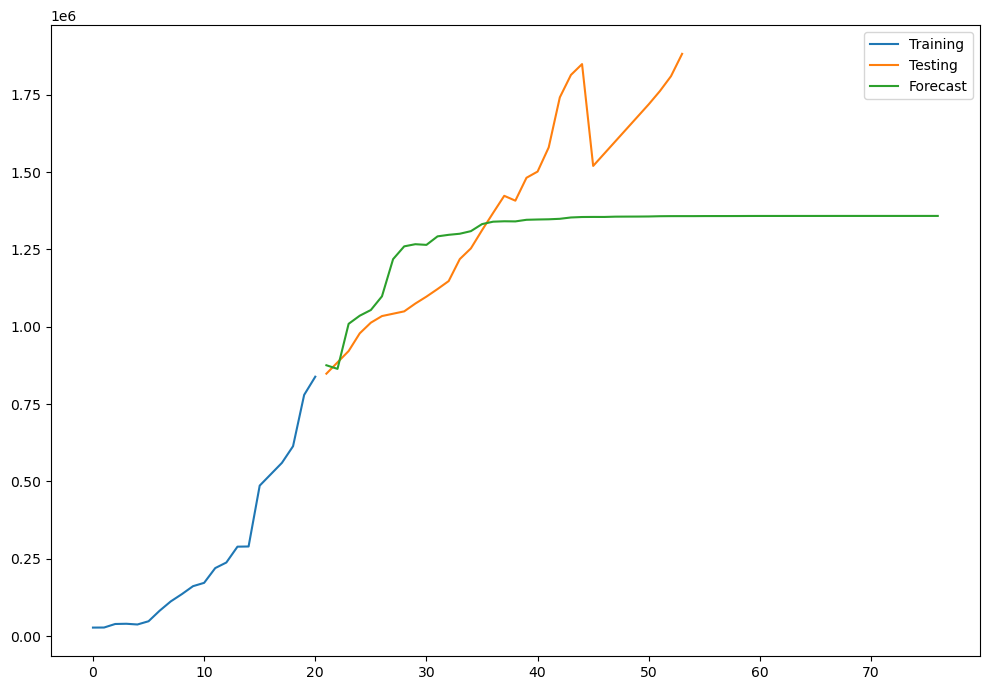

21    8.755185e+05
22    8.638858e+05
23    1.009495e+06
24    1.035733e+06
25    1.054168e+06
26    1.098421e+06
27    1.218602e+06
28    1.259943e+06
29    1.266945e+06
30    1.264742e+06
31    1.292314e+06
32    1.297282e+06
33    1.300773e+06
34    1.309153e+06
35    1.331910e+06
36    1.339738e+06
37    1.341064e+06
38    1.340647e+06
39    1.345868e+06
40    1.346809e+06
41    1.347470e+06
42    1.349056e+06
43    1.353366e+06
44    1.354848e+06
45    1.355099e+06
46    1.355020e+06
47    1.356009e+06
48    1.356187e+06
49    1.356312e+06
50    1.356612e+06
51    1.357428e+06
52    1.357709e+06
53    1.357757e+06
54    1.357742e+06
55    1.357929e+06
56    1.357963e+06
57    1.357986e+06
58    1.358043e+06
59    1.358198e+06
60    1.358251e+06
61    1.358260e+06
62    1.358257e+06
63    1.358292e+06
64    1.358299e+06
65    1.358303e+06
66    1.358314e+06
67    1.358343e+06
68    1.358353e+06
69    1.358355e+06
70    1.358355e+06
71    1.358361e+06
72    1.358362e+06
73    1.3583

In [89]:
######################################

#              SARIMA

#####################################



# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Split data into training and testing sets
train = data.loc[:'2022-05-01']
test = data.loc['2022-06-01':]

# Fit SARIMA model to training data
model = SARIMAX(train['Internal Displaced People'], order=(0, 1, 0), seasonal_order=(1, 0, 1, 8))
model_fit = model.fit()

# Generate forecasts for the next 24 months
forecasts = model_fit.forecast(steps=56)

# Calculate evaluation metrics
mae = mean_absolute_error(test['Internal Displaced People'],
                          forecasts[:len(test['Internal Displaced People'])])
mse = mean_squared_error(test['Internal Displaced People'], 
                         forecasts[:len(test['Internal Displaced People'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internal Displaced People'] - forecasts[:len(test['Internal Displaced People'])]) / test['Internal Displaced People'])) * 100
accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and actual values
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(train['Internal Displaced People'], label='Training')
plt.plot(test['Internal Displaced People'], label='Testing')
plt.plot(forecasts, label='Forecast')
plt.legend()
plt.show()

print(forecasts)


In [126]:
data_cut_new

,Date,Violent events,Demonstrations,Non-violent actions,Floods,Storms,Internal Displaced People
0,2018-07-01,14,1,1,18,3,27347
1,2018-08-01,13,5,3,211,4,27571
2,2018-09-01,33,6,11,33,0,38982
3,2018-10-01,31,17,12,3,0,39731
4,2018-11-01,37,35,15,0,0,37367
5,2018-12-01,36,15,11,0,0,47826
6,2019-01-01,53,35,4,0,0,81964
7,2019-02-01,40,16,16,0,0,112057
8,2019-03-01,51,8,8,0,0,135589
9,2019-04-01,72,21,8,0,3,161217


In [181]:
df = data_cut_new
# Etape 2: quantifier la relation entre conflits et déplacements internes
model1 = LinearRegression().fit(data_cut_new[['Violent events']], data_cut_new['Internal Displaced People'])
print("Coefficients pour le nombre de conflits: ", model1.coef_)

# Etape 3: ajouter les inondations et étudier leur effet sur la relation conflits/déplacements internes
model2 = ols('Q("Internal Displaced People") ~ Q("Violent events") + Q("Floods")', data=df).fit()
print(model2.summary())

Coefficients pour le nombre de conflits:  [9414.73853059]
                                  OLS Regression Results                                  
Dep. Variable:     Q("Internal Displaced People")   R-squared:                       0.538
Model:                                        OLS   Adj. R-squared:                  0.520
Method:                             Least Squares   F-statistic:                     29.75
Date:                            Fri, 31 Mar 2023   Prob (F-statistic):           2.73e-09
Time:                                    23:13:30   Log-Likelihood:                -775.21
No. Observations:                              54   AIC:                             1556.
Df Residuals:                                  51   BIC:                             1562.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                          coef  